# THIS BENCHMARK WILL NO LONGER WORK THIS IS PRESERVED FOR THE RESULTS

In [1]:
import sys
import os

from notscared import snr
from notscared.data import trace_handler as sequential
from notscared.data import trace_handler_advanced as advanced
from notscared import cpa
import time
import matplotlib.pyplot as plt
import numpy as np

# SNR benchmark for Zarr advanced indexing functions
***

Default values: 1 byte, 5000 batch size, and 50k traces. Using file named "1x1x100000_r1_singlerail5_sr_ise.zarr".

Old sequential trace handler

In [2]:
initial = 50000
db_file = '1x1x100000_r1_singlerail5_sr_ise.zarr'
proj_root = os.getcwd()
file_name = os.path.join(proj_root, db_file)
to_avg = np.array([])

th = sequential.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial)

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

old = avg

opened zarr file  /Users/utkarshsaxenna/Documents/capstone/notscared2/benchmarking/1x1x100000_r1_singlerail5_sr_ise.zarr
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
9.000908180668679


## Sample downsampling
***

### Initialization
***

In [3]:
Results_6k_7K = {}
Results_full = {}
db_file = '1x1x100000_r1_singlerail5_sr_ise.zarr'
proj_root = os.getcwd()
file_name = os.path.join(proj_root, db_file)
print(file_name)

/Users/utkarshsaxenna/Documents/capstone/notscared2/benchmarking/1x1x100000_r1_singlerail5_sr_ise.zarr


### Benchmarking and verification
***

New advanced indexing trace handler result verification

opened zarr file  /Users/utkarshsaxenna/Documents/capstone/notscared2/benchmarking/1x1x100000_r1_singlerail5_sr_ise.zarr
24999
Computing SNR: Tiles:  False  Bytes:  [0]


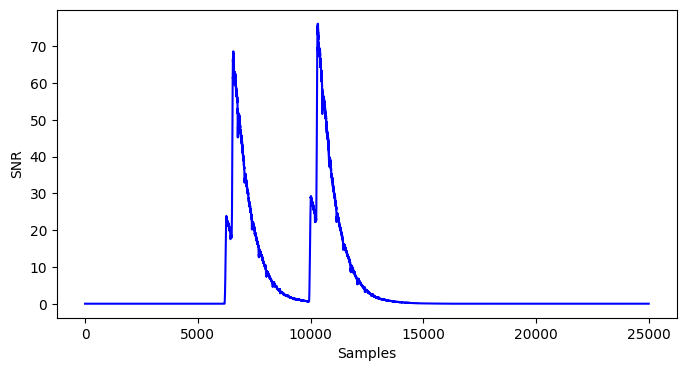

In [4]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001)

result = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)

result.run()

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0,:], 'blue')

plt.ylabel("SNR")
plt.xlabel("Samples")
plt.show()

New trace handler no down sampling

In [5]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial)

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_full[1] = avg

opened zarr file  /Users/utkarshsaxenna/Documents/capstone/notscared2/benchmarking/1x1x100000_r1_singlerail5_sr_ise.zarr
24999
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
9.030179250335399


slice of 6000-7000 Verification

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
1000
Computing SNR: Tiles:  False  Bytes:  [0]


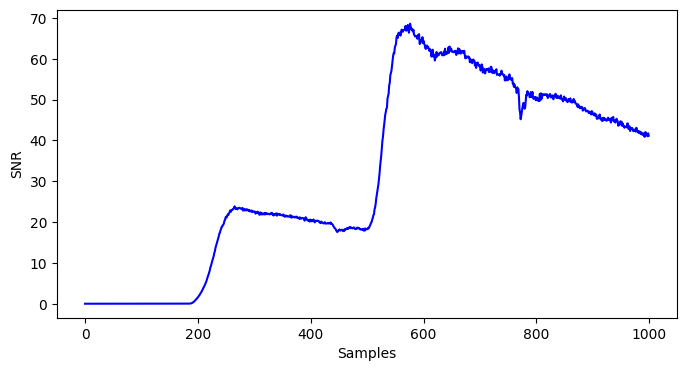

In [99]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    time_slice=[6000,7000])

result = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)

result.run()

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0,:], 'blue')

plt.ylabel("SNR")
plt.xlabel("Samples")
plt.show()

slice of 6000-7000 benchmark

In [100]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    time_slice=[6000,7000])

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_6k_7K[1] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
1000
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
10.962598633331558


slice of 0-24998 every 2nd point Verification

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
12499
Computing SNR: Tiles:  False  Bytes:  [0]


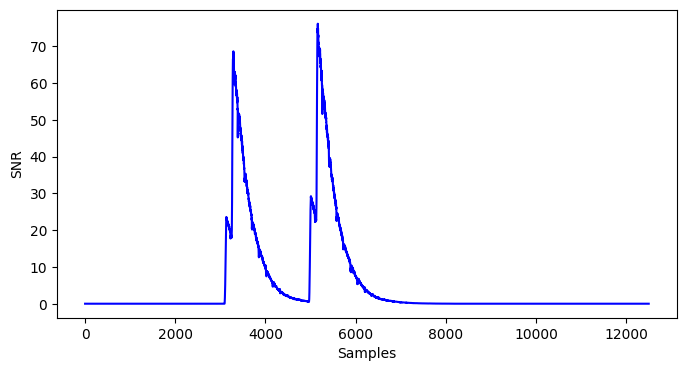

In [101]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    time_slice=[0,24998,2])

result = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)

result.run()

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0,:], 'blue')

plt.ylabel("SNR")
plt.xlabel("Samples")
plt.show()

slice of 0-24998 every 2nd point benchmark

In [102]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    time_slice=[0,24998,2])

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_full[2] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
12499
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
13.37258060000992


slice of 6000-7000 every 2nd point verification

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
500
Computing SNR: Tiles:  False  Bytes:  [0]


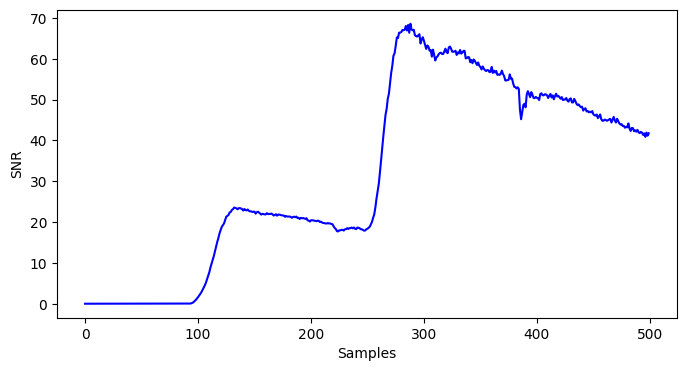

In [103]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    time_slice=[6000,7000,2])

result = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)

result.run()

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0,:], 'blue')

plt.ylabel("SNR")
plt.xlabel("Samples")
plt.show()

slice of 6000-7000 every 2nd point benchmark

In [104]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    time_slice=[6000,7000,2])

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_6k_7K[2] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
500
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
11.028986666700803


slice of 0-24998 every 3rd point verification

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
8333
Computing SNR: Tiles:  False  Bytes:  [0]


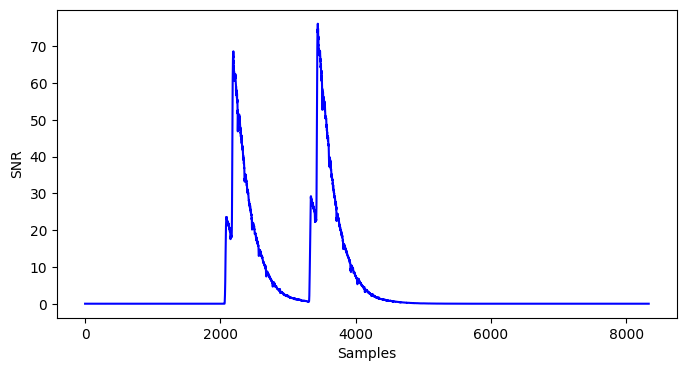

In [105]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    time_slice=[0,24998,3])

result = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)

result.run()

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0,:], 'blue')

plt.ylabel("SNR")
plt.xlabel("Samples")
plt.show()

slice of 0-24998 every 3rd point benchmark

In [106]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    time_slice=[0,24998,3])

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_full[3] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
8333
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
12.529876666686809


slice of 6000-7000 every 3rd point verification

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
334
Computing SNR: Tiles:  False  Bytes:  [0]


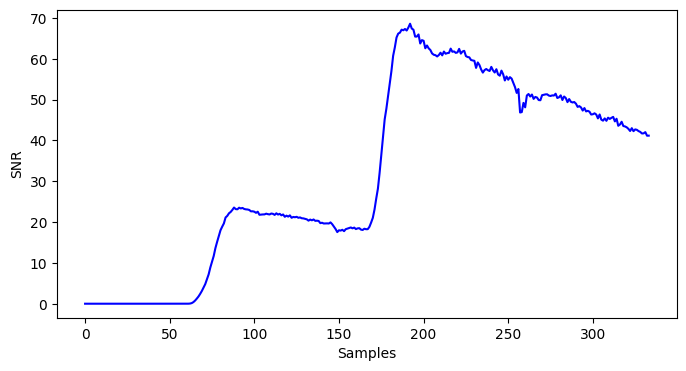

In [107]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    time_slice=[6000,7000,3])

result = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)

result.run()

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0,:], 'blue')

plt.ylabel("SNR")
plt.xlabel("Samples")
plt.show()

slice of 6000-7000 every 3rd point benchmark

In [108]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    time_slice=[6000,7000,3])

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_6k_7K[3] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
334
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
10.842607999996593


### Results
***

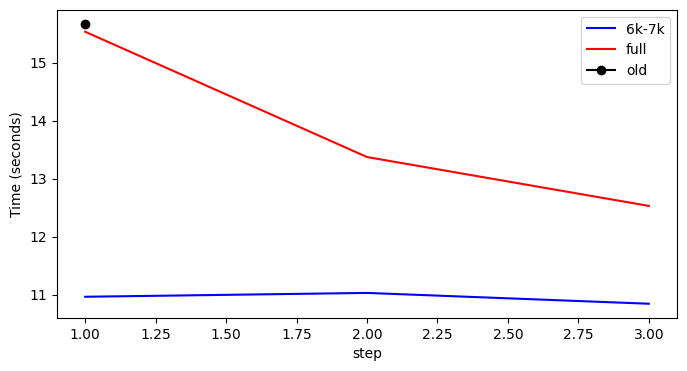

In [109]:
fig, ax = plt.subplots(figsize=(8, 4))

small = Results_6k_7K.items()
x_small, y_small = zip(*small)

large = Results_full.items()
x_large, y_large = zip(*large)

labels = []

labels.append('6k-7k')
ax.plot(x_small, y_small, color='blue')

labels.append('full')
ax.plot(x_large, y_large, color='red')

labels.append('old')
ax.plot(1, old, marker='o', color='black')

ax.set_xlabel('step')
ax.set_ylabel('Time (seconds)')
ax.legend(labels)

## Traces downsampling
***

### Initialization
***

In [6]:
Results = {}
db_file = '1x1x100000_r1_singlerail5_sr_ise.zarr'
proj_root = os.getcwd()
file_name = os.path.join(proj_root, db_file)
print(file_name)

/Users/utkarshsaxenna/Documents/capstone/notscared2/benchmarking/1x1x100000_r1_singlerail5_sr_ise.zarr


### Benchmarking and verification
***

Every trace

In [7]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial)

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results[1] = avg

opened zarr file  /Users/utkarshsaxenna/Documents/capstone/notscared2/benchmarking/1x1x100000_r1_singlerail5_sr_ise.zarr
24999
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
9.113275541666857


Every 2nd trace verification

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
24999
Computing SNR: Tiles:  False  Bytes:  [0]


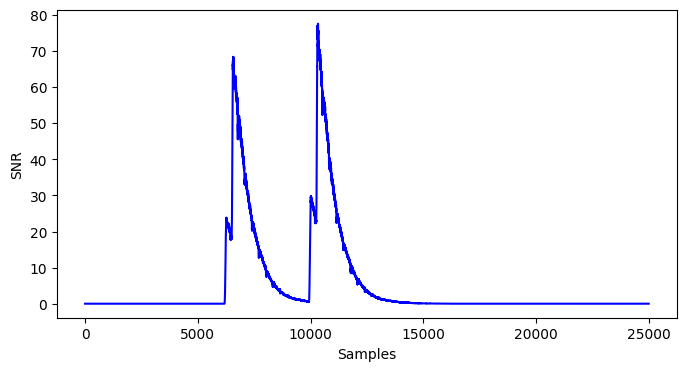

In [112]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    trace_step=2)

result = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)

result.run()

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0,:], 'blue')

plt.ylabel("SNR")
plt.xlabel("Samples")
plt.show()

Every 2nd trace benchmark

In [113]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    trace_step=2)

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results[2] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
24999
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
9.192942399997264


Every 3rd trace verification

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
24999
Computing SNR: Tiles:  False  Bytes:  [0]


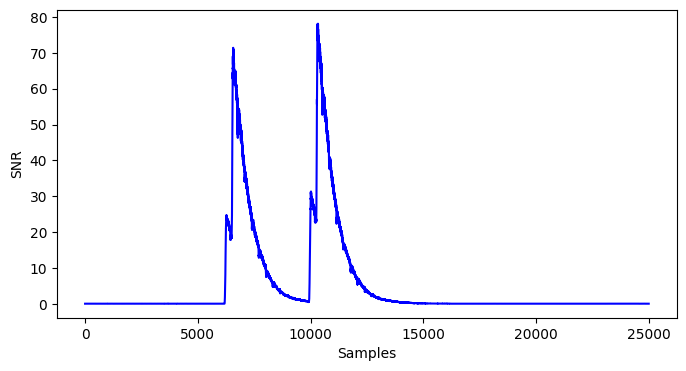

In [114]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    trace_step=3)

result = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)

result.run()

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0,:], 'blue')

plt.ylabel("SNR")
plt.xlabel("Samples")
plt.show()

Every 3rd trace benchmark

In [115]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    trace_step=3)

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results[3] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
24999
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
9.62096143339295


Every 4th trace verification

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
24999
Computing SNR: Tiles:  False  Bytes:  [0]


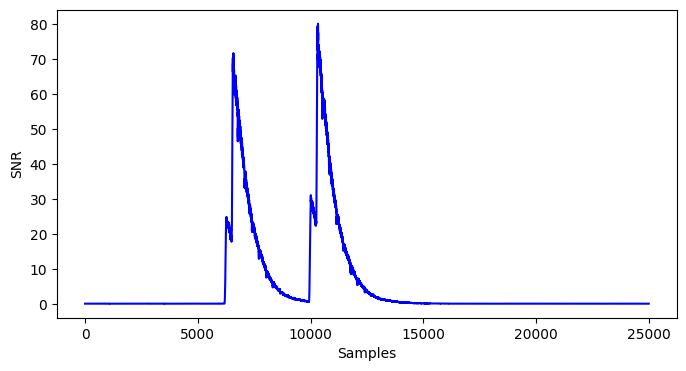

In [116]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    trace_step=4)

result = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)

result.run()

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0,:], 'blue')

plt.ylabel("SNR")
plt.xlabel("Samples")
plt.show()

Every 4th trace benchmark

In [117]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    trace_step=4)

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results[4] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
24999
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
7.712726133332278


Every 5th trace verification

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
24999
Computing SNR: Tiles:  False  Bytes:  [0]


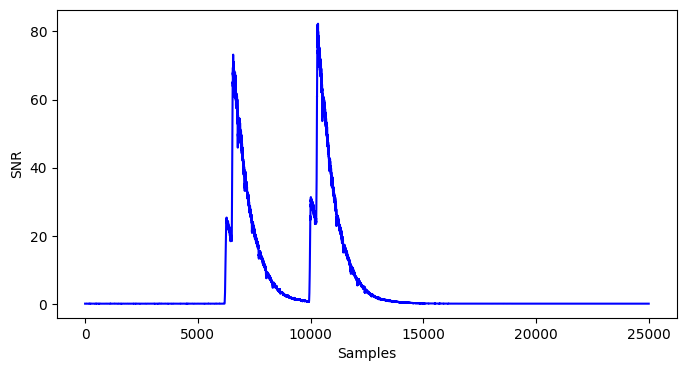

In [118]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    trace_step=5)

result = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)

result.run()

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0,:], 'blue')

plt.ylabel("SNR")
plt.xlabel("Samples")
plt.show()

Every 5th trace benchmark

In [119]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    trace_step=5)

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results[5] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
24999
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
8.992205866690105


Every 6th trace verification

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
24999
Computing SNR: Tiles:  False  Bytes:  [0]


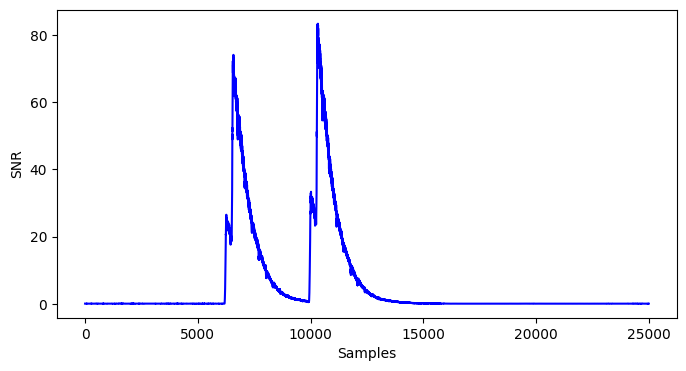

In [120]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    trace_step=6)

result = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)

result.run()

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0,:], 'blue')

plt.ylabel("SNR")
plt.xlabel("Samples")
plt.show()

Every 6th trace benchmark

In [121]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    trace_step=6)

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results[6] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
24999
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
7.385635466664098


Every 7th trace verification

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
24999
Computing SNR: Tiles:  False  Bytes:  [0]


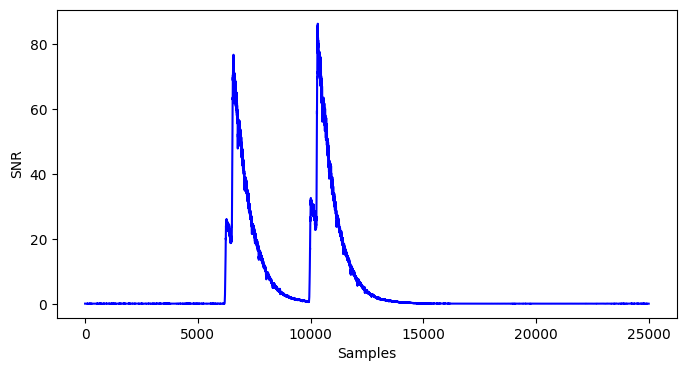

In [122]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    trace_step=7)

result = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)

result.run()

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0,:], 'blue')

plt.ylabel("SNR")
plt.xlabel("Samples")
plt.show()

Every 7th trace benchmark

In [123]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    trace_step=7)

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results[7] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
24999
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
8.44301096664276


Every 8th trace verification

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
24999
Computing SNR: Tiles:  False  Bytes:  [0]


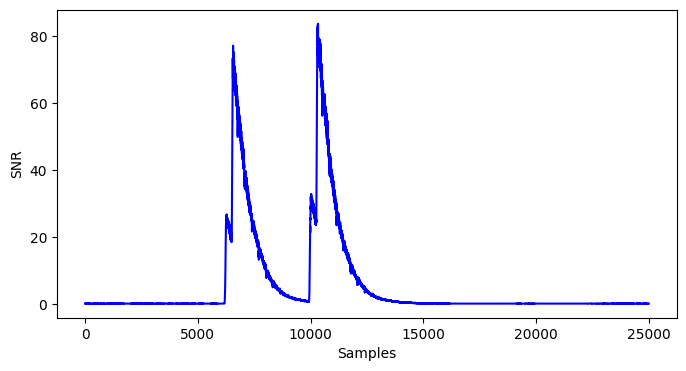

In [124]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    trace_step=8)

result = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)

result.run()

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0,:], 'blue')

plt.ylabel("SNR")
plt.xlabel("Samples")
plt.show()

Every 8th trace benchmark

In [125]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    trace_step=8)

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results[8] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
24999
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
7.543865833353872


Every 9th trace verification

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
24999
Computing SNR: Tiles:  False  Bytes:  [0]


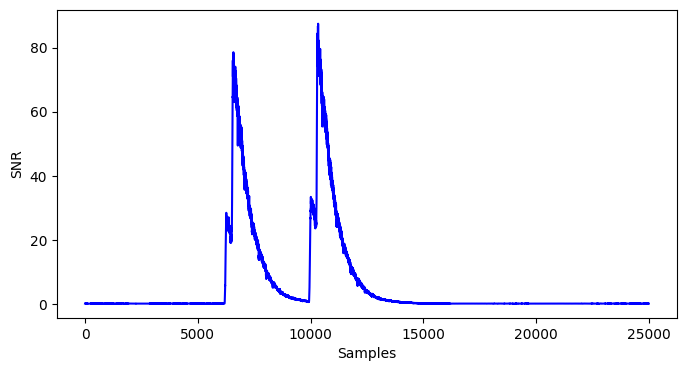

In [126]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    trace_step=9)

result = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)

result.run()

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0,:], 'blue')

plt.ylabel("SNR")
plt.xlabel("Samples")
plt.show()

Every 9th trace benchmark

In [127]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    trace_step=9)

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results[9] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
24999
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
8.533337366689617


Every 10th trace verification

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
24999
Computing SNR: Tiles:  False  Bytes:  [0]


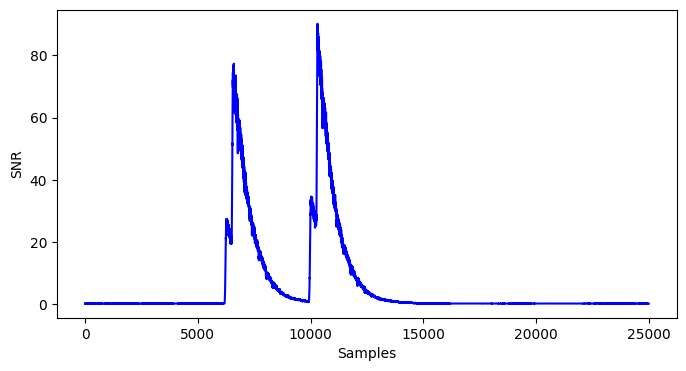

In [128]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    trace_step=10)

result = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)

result.run()

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0,:], 'blue')

plt.ylabel("SNR")
plt.xlabel("Samples")
plt.show()

Every 10th trace benchmark

In [129]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    trace_step=10)

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results[10] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
24999
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
8.090201400026368


### Results
***

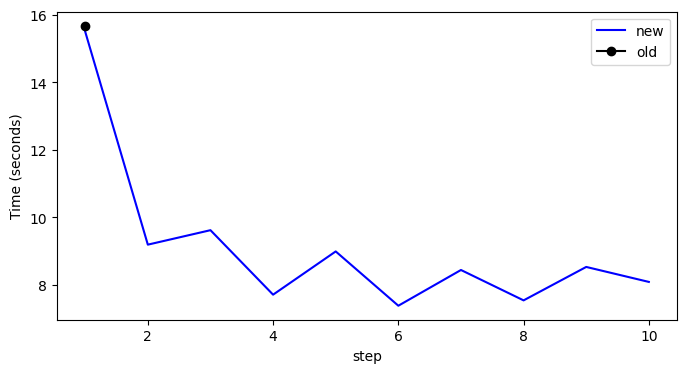

In [130]:
fig, ax = plt.subplots(figsize=(8, 4))

items = Results.items()
x, y = zip(*items)


labels = []

labels.append('new')
ax.plot(x,y, color='blue')

labels.append('old')
ax.plot(1,old, marker='o',color='black')

ax.set_xlabel('step')
ax.set_ylabel('Time (seconds)')
ax.legend(labels)

## Trace and sample downsampling
***

### Initialization
***

In [8]:
Results_1 = {}
Results_2 = {}
Results_3 = {}
db_file = '1x1x100000_r1_singlerail5_sr_ise.zarr'
proj_root = os.getcwd()
file_name = os.path.join(proj_root, db_file)
print(file_name)

/Users/utkarshsaxenna/Documents/capstone/notscared2/benchmarking/1x1x100000_r1_singlerail5_sr_ise.zarr


### Benchmarking and Verification
***

Verification for 6k-7k and every 6th trace

opened zarr file  /Users/utkarshsaxenna/Documents/capstone/notscared2/benchmarking/1x1x100000_r1_singlerail5_sr_ise.zarr
1000
Computing SNR: Tiles:  False  Bytes:  [0]


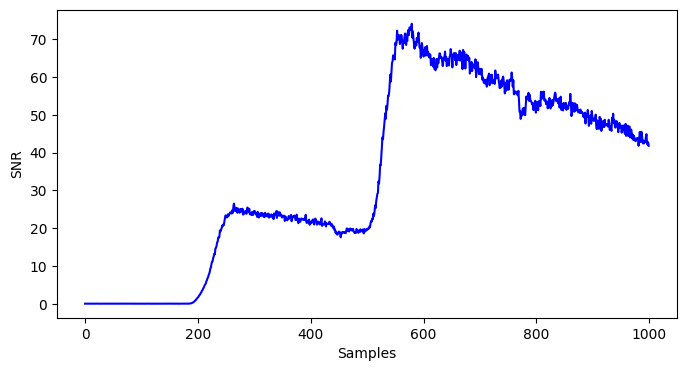

In [9]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    time_slice=[6000,7000],
                                    trace_step=6)

result = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)

result.run()

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0,:], 'blue')

plt.ylabel("SNR")
plt.xlabel("Samples")
plt.show()

Benchmark for 6k-7k and every 6th trace

In [133]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    time_slice=[6000,7000],
                                    trace_step=6)

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_1[6] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
1000
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
6.156445866644693


Verification for 6k-7k every 8th trace

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
1000
Computing SNR: Tiles:  False  Bytes:  [0]


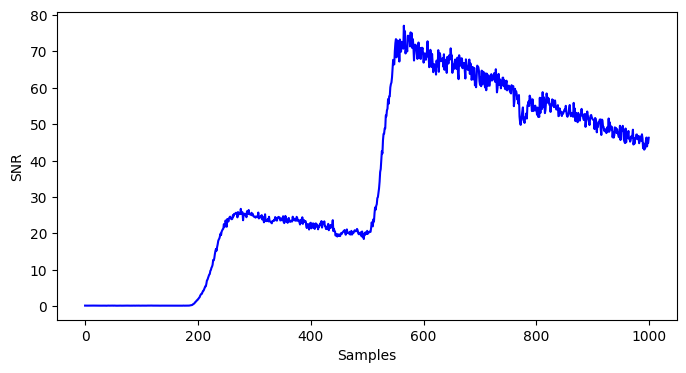

In [134]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    time_slice=[6000,7000],
                                    trace_step=8)

result = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)

result.run()

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0,:], 'blue')

plt.ylabel("SNR")
plt.xlabel("Samples")
plt.show()

Benchmark for 6k-7k every 8th trace

In [135]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    time_slice=[6000,7000],
                                    trace_step=8)

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_1[8] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
1000
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
6.261154233322789


Verification for 6k-7k every 10th trace

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
1000
Computing SNR: Tiles:  False  Bytes:  [0]


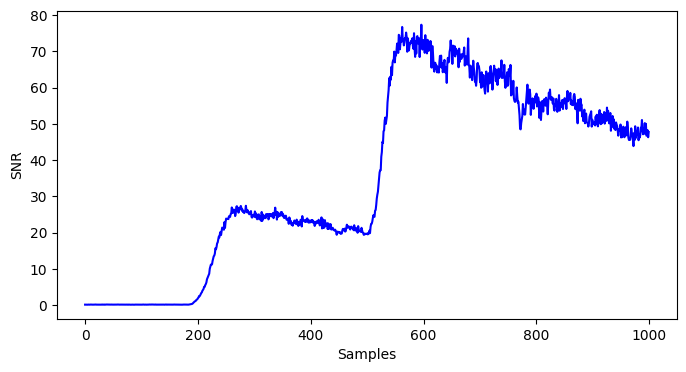

In [136]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    time_slice=[6000,7000],
                                    trace_step=10)

result = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)

result.run()

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0,:], 'blue')

plt.ylabel("SNR")
plt.xlabel("Samples")
plt.show()

Benchmark for 6k-7k every 10th trace

In [137]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    time_slice=[6000,7000],
                                    trace_step=10)

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_1[10] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
1000
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
6.6873827667053165


Verification for 6k-7k every 2nd point every 6th trace

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
500
Computing SNR: Tiles:  False  Bytes:  [0]


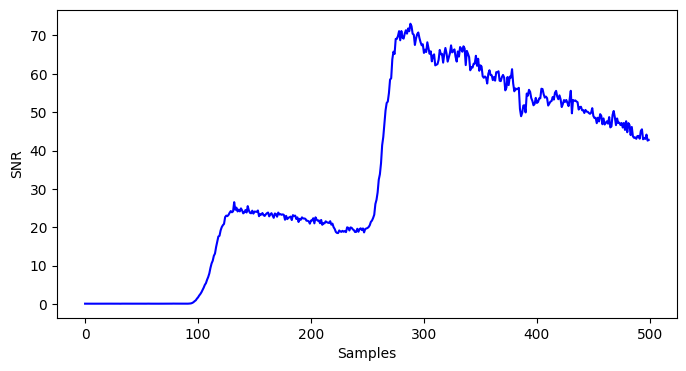

In [138]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    time_slice=[6000,7000,2],
                                    trace_step=6)

result = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)

result.run()

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0,:], 'blue')

plt.ylabel("SNR")
plt.xlabel("Samples")
plt.show()

Benchmark for 6k-7k every 2nd point every 6th trace

In [139]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    time_slice=[6000,7000,2],
                                    trace_step=6)

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_2[6] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
500
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
6.112676599955496


Verification for 6k-7k every 2nd point every 8th trace

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
500
Computing SNR: Tiles:  False  Bytes:  [0]


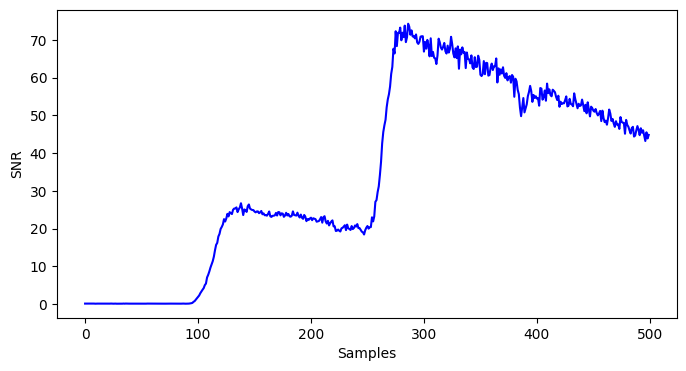

In [140]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    time_slice=[6000,7000,2],
                                    trace_step=8)

result = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)

result.run()

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0,:], 'blue')

plt.ylabel("SNR")
plt.xlabel("Samples")
plt.show()

Benchmark for 6k-7k every 2nd point every 8th trace

In [141]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    time_slice=[6000,7000,2],
                                    trace_step=8)

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_2[8] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
500
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
6.090535966718259


Verification for 6k-7k every 2nd point 10th trace

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
500
Computing SNR: Tiles:  False  Bytes:  [0]


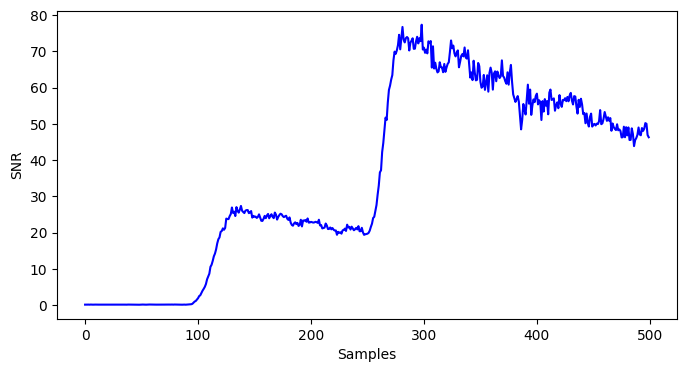

In [142]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    time_slice=[6000,7000,2],
                                    trace_step=10)

result = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)

result.run()

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0,:], 'blue')

plt.ylabel("SNR")
plt.xlabel("Samples")
plt.show()

Benchmark for 6k-7k every 2nd point every 10th trace

In [143]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    time_slice=[6000,7000,2],
                                    trace_step=10)

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_2[10] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
500
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
6.620532866644983


Verification for 6k-7k every 3rd point every 6th trace

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
334
Computing SNR: Tiles:  False  Bytes:  [0]


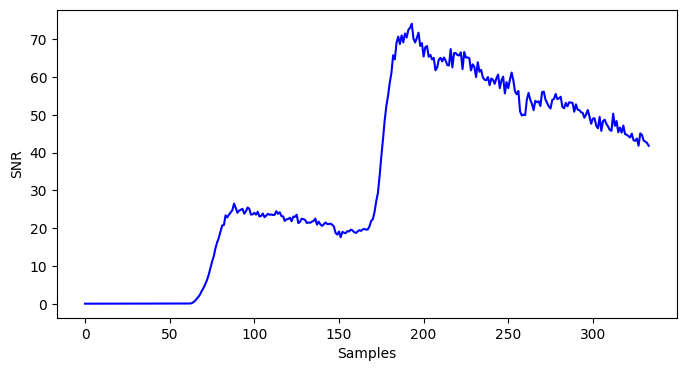

In [144]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    time_slice=[6000,7000,3],
                                    trace_step=6)

result = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)

result.run()

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0,:], 'blue')

plt.ylabel("SNR")
plt.xlabel("Samples")
plt.show()

Benchmark for 6k-7k every 3rd point every 6th trace

In [145]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    time_slice=[6000,7000,3],
                                    trace_step=6)

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_3[6] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
334
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
6.094842366680193


Verification for 6k-7k every 3rd point every 8th trace

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
334
Computing SNR: Tiles:  False  Bytes:  [0]


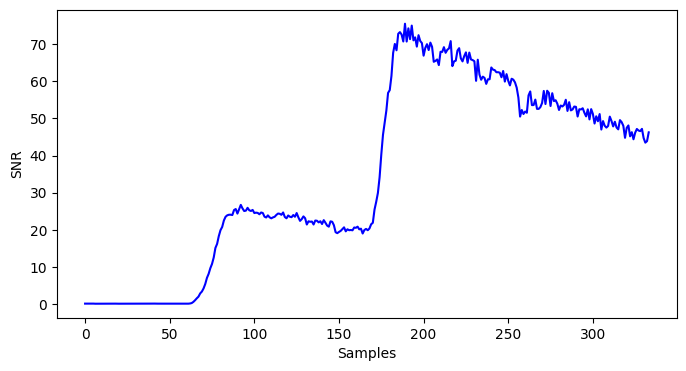

In [146]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    time_slice=[6000,7000,3],
                                    trace_step=8)

result = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)

result.run()

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0,:], 'blue')

plt.ylabel("SNR")
plt.xlabel("Samples")
plt.show()

Benchmark for 6k-7k every 3rd point every 8th trace

In [147]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    time_slice=[6000,7000,3],
                                    trace_step=8)

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_3[8] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
334
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
6.06716603335614


Verification for 6k-7k every 3rd point every 10th trace

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
334
Computing SNR: Tiles:  False  Bytes:  [0]


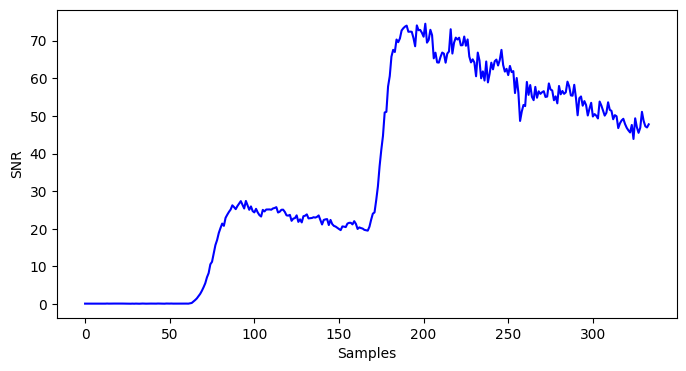

In [148]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    time_slice=[6000,7000,3],
                                    trace_step=10)

result = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)

result.run()

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0,:], 'blue')

plt.ylabel("SNR")
plt.xlabel("Samples")
plt.show()

Benchmark for 6k-7k every 3rd point every 10th trace

In [149]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    time_slice=[6000,7000,3],
                                    trace_step=10)

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_3[10] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
334
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
Computing SNR: Tiles:  False  Bytes:  [0]
6.645926166636248


### Results
***

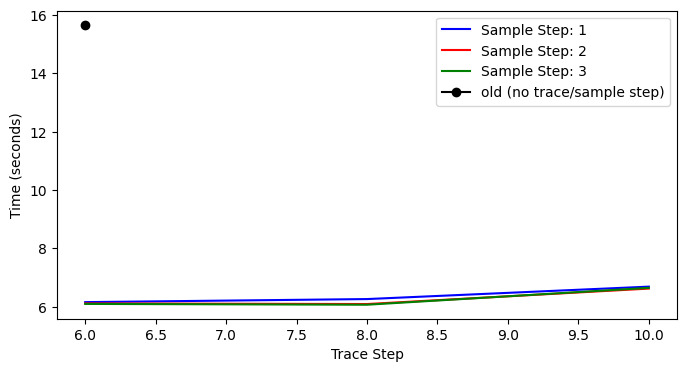

In [150]:
fig, ax = plt.subplots(figsize=(8, 4))

items_1 = Results_1.items()
x_1, y_1 = zip(*items_1)

items_2 = Results_2.items()
x_2, y_2 = zip(*items_2)

items_3 = Results_3.items()
x_3, y_3 = zip(*items_3)

labels = []

labels.append('Sample Step: 1')
ax.plot(x_1,y_1, color='blue')

labels.append('Sample Step: 2')
ax.plot(x_2,y_2, color='red')

labels.append('Sample Step: 3')
ax.plot(x_3,y_3, color='green')

labels.append('old (no trace/sample step)')
ax.plot(6,old, marker='o',color='black')

ax.set_xlabel('Trace Step')
ax.set_ylabel('Time (seconds)')
ax.legend(labels)

## 16 byte downsampling
***

old

In [10]:
initial = 50000
db_file = '1x1x100000_r1_singlerail5_sr_ise.zarr'
proj_root = os.getcwd()
file_name = os.path.join(proj_root, db_file)
to_avg = np.array([])

th = sequential.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial)

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

old_16 = avg

opened zarr file  /Users/utkarshsaxenna/Documents/capstone/notscared2/benchmarking/1x1x100000_r1_singlerail5_sr_ise.zarr
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
25.972912291336495


### 16 bytes traces downsampling
***

Initialization

In [11]:
Results_16 = {}
db_file = '1x1x100000_r1_singlerail5_sr_ise.zarr'
proj_root = os.getcwd()
file_name = os.path.join(proj_root, db_file)
print(file_name)

/Users/utkarshsaxenna/Documents/capstone/notscared2/benchmarking/1x1x100000_r1_singlerail5_sr_ise.zarr


#### Benchmarking and Verification
***

Every Trace verification

opened zarr file  /Users/utkarshsaxenna/Documents/capstone/notscared2/benchmarking/1x1x100000_r1_singlerail5_sr_ise.zarr
24999
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


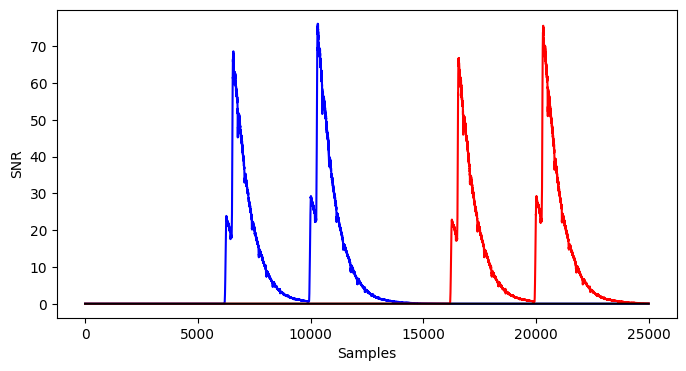

In [12]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001)

result = snr.SNR(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], file_name=file_name)

result.run()

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0,:], 'blue')
ax.plot(result.results[1,:], 'red')
ax.plot(result.results[15,:], 'black')

plt.ylabel("SNR")
plt.xlabel("Samples")
plt.show()

Every trace benchmark

In [154]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial)

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_16[1] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
24999
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
47.695611899990276


Every 2nd trace verification

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
24999
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


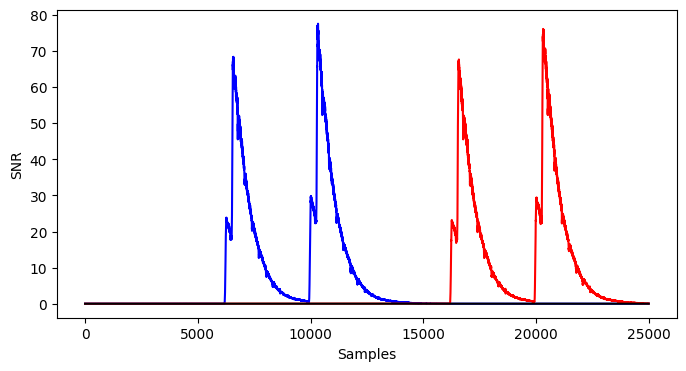

In [155]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    trace_step=2)

result = snr.SNR(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], file_name=file_name)

result.run()

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0,:], 'blue')
ax.plot(result.results[1,:], 'red')
ax.plot(result.results[15,:], 'black')

plt.ylabel("SNR")
plt.xlabel("Samples")
plt.show()

Every 2nd trace benchmark

In [156]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    trace_step=2)

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_16[2] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
24999
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
26.408672033343464


Every 6th trace verification

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
24999
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


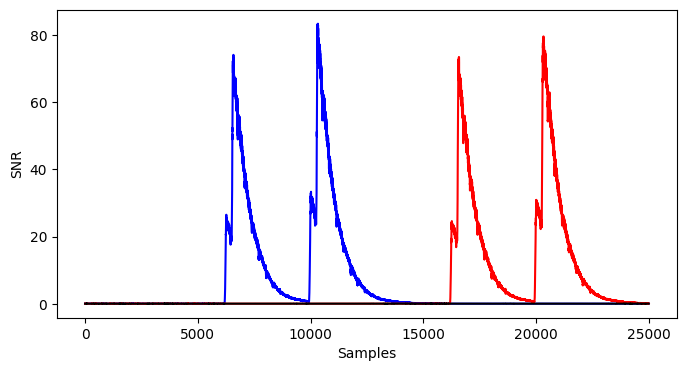

In [157]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    trace_step=6)

result = snr.SNR(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], file_name=file_name)

result.run()

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0,:], 'blue')
ax.plot(result.results[1,:], 'red')
ax.plot(result.results[15,:], 'black')

plt.ylabel("SNR")
plt.xlabel("Samples")
plt.show()

Every 6th trace benchmark

In [158]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    trace_step=6)

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_16[6] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
24999
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
20.325255600037053


Every 7th trace verification

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
24999
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


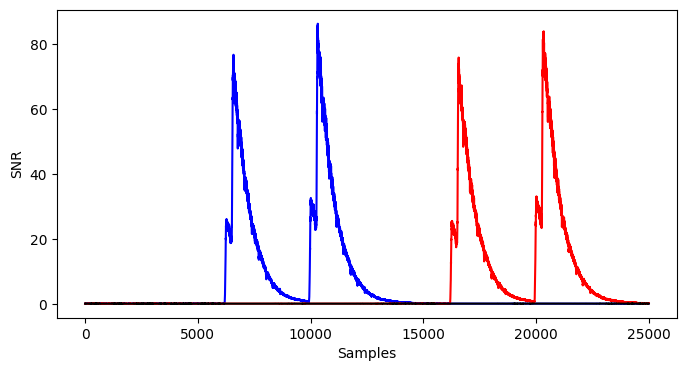

In [159]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    trace_step=7)

result = snr.SNR(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], file_name=file_name)

result.run()

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0,:], 'blue')
ax.plot(result.results[1,:], 'red')
ax.plot(result.results[15,:], 'black')

plt.ylabel("SNR")
plt.xlabel("Samples")
plt.show()

Every 7th trace benchmark

In [160]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    trace_step=7)

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_16[7] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
24999
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
22.548163166657712


Every 8th trace verification

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
24999
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


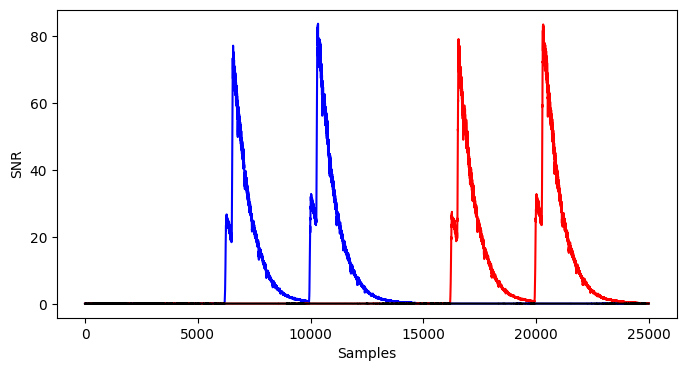

In [161]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    trace_step=8)

result = snr.SNR(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], file_name=file_name)

result.run()

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0,:], 'blue')
ax.plot(result.results[1,:], 'red')
ax.plot(result.results[15,:], 'black')

plt.ylabel("SNR")
plt.xlabel("Samples")
plt.show()

Every 8th trace benchmark

In [162]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    trace_step=8)

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_16[8] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
24999
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
19.623156266713824


Every 9th trace verification

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
24999
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


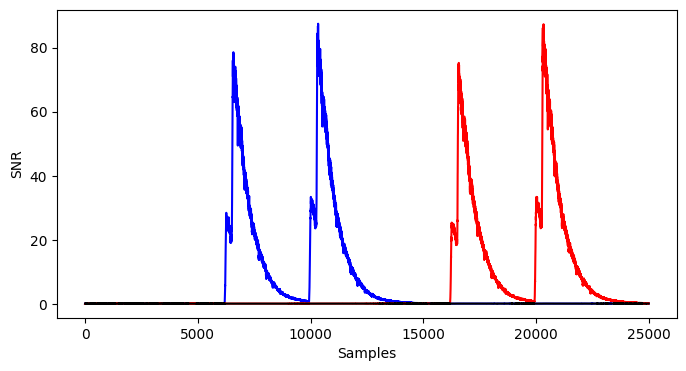

In [163]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    trace_step=9)

result = snr.SNR(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], file_name=file_name)

result.run()

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0,:], 'blue')
ax.plot(result.results[1,:], 'red')
ax.plot(result.results[15,:], 'black')

plt.ylabel("SNR")
plt.xlabel("Samples")
plt.show()

Every 9th trace benchmark

In [164]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    trace_step=9)

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_16[9] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
24999
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
22.23933276666018


Every 10th trace verification

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
24999
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


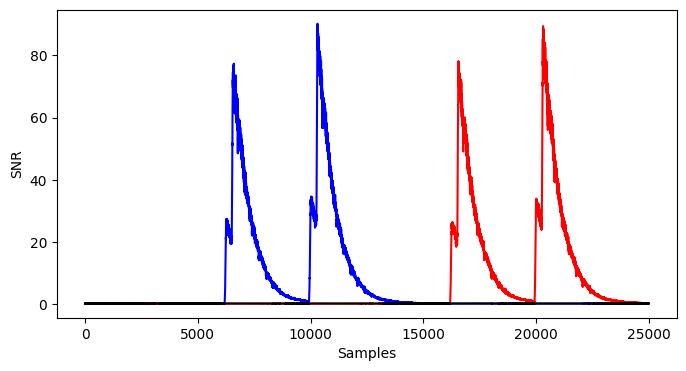

In [165]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    trace_step=10)

result = snr.SNR(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], file_name=file_name)

result.run()

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0,:], 'blue')
ax.plot(result.results[1,:], 'red')
ax.plot(result.results[15,:], 'black')

plt.ylabel("SNR")
plt.xlabel("Samples")
plt.show()

Every 10th trace benchmark

In [166]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    trace_step=10)

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_16[10] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
24999
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
19.77620856669576


#### Results
***

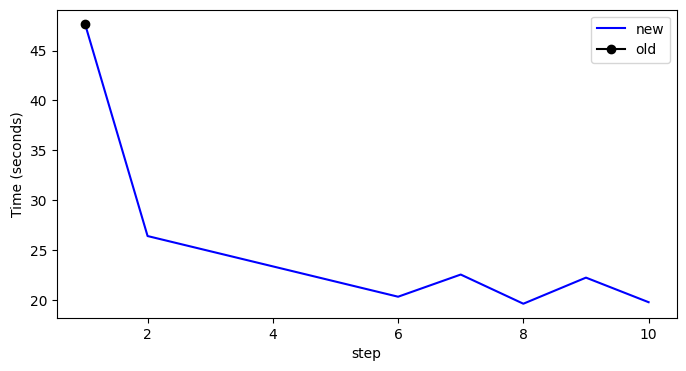

In [167]:
fig, ax = plt.subplots(figsize=(8, 4))

items = Results_16.items()
x, y = zip(*items)


labels = []

labels.append('new')
ax.plot(x,y, color='blue')

labels.append('old')
ax.plot(1,old_16, marker='o',color='black')

ax.set_xlabel('step')
ax.set_ylabel('Time (seconds)')
ax.legend(labels)

### 16 bytes traces and sample downsampling
***

Initialization

In [13]:
Results_1_16 = {}
Results_2_16 = {}
Results_3_16 = {}
db_file = '1x1x100000_r1_singlerail5_sr_ise.zarr'
proj_root = os.getcwd()
file_name = os.path.join(proj_root, db_file)
print(file_name)

/Users/utkarshsaxenna/Documents/capstone/notscared2/benchmarking/1x1x100000_r1_singlerail5_sr_ise.zarr


#### Benchmarking and Verirification
***

Verification for full slice every 5th point every 6th trace verification

opened zarr file  /Users/utkarshsaxenna/Documents/capstone/notscared2/benchmarking/1x1x100000_r1_singlerail5_sr_ise.zarr
5000
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


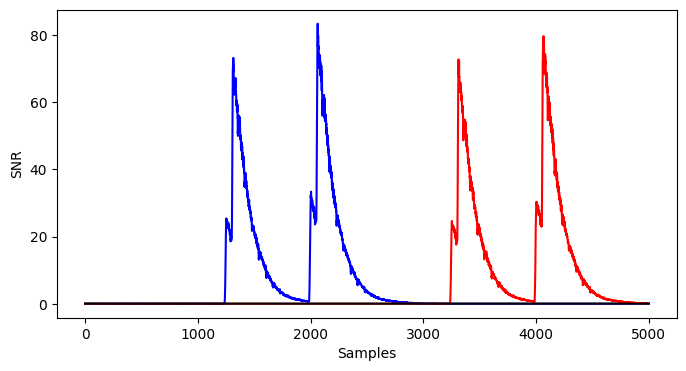

In [14]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    time_slice=[0,24998,5],
                                    trace_step=6)

result = snr.SNR(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], file_name=file_name)

result.run()

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0,:], 'blue')
ax.plot(result.results[1,:], 'red')
ax.plot(result.results[15,:], 'black')

plt.ylabel("SNR")
plt.xlabel("Samples")
plt.show()

Benchmark for full slice every 5th point every 6th trace

In [170]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    time_slice=[0, 24998, 5],
                                    trace_step=6)

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_1_16[5] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
5000
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
16.876778700000916


Verfification for full slice every 5th point every 8th trace

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
5000
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


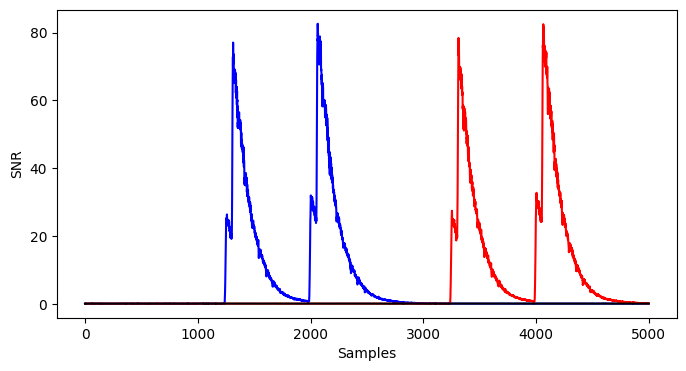

In [171]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    time_slice=[0,24998,5],
                                    trace_step=8)

result = snr.SNR(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], file_name=file_name)

result.run()

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0,:], 'blue')
ax.plot(result.results[1,:], 'red')
ax.plot(result.results[15,:], 'black')

plt.ylabel("SNR")
plt.xlabel("Samples")
plt.show()

Benchmark for for full slice every 5th point every 8th trace

In [172]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    time_slice=[0, 24998, 5],
                                    trace_step=8)

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_2_16[5] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
5000
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
17.21584099996835


Verification for full slice every 5th point every 10th trace

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
5000
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


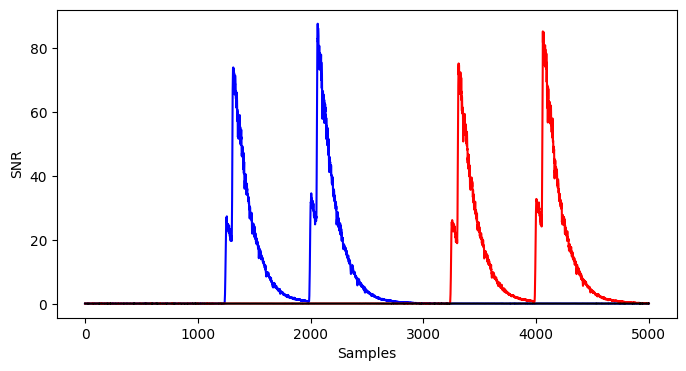

In [173]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    time_slice=[0,24998,5],
                                    trace_step=10)

result = snr.SNR(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], file_name=file_name)

result.run()

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0,:], 'blue')
ax.plot(result.results[1,:], 'red')
ax.plot(result.results[15,:], 'black')

plt.ylabel("SNR")
plt.xlabel("Samples")
plt.show()

Benchmark for full slice every 5th point every 10th trace

In [174]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    time_slice=[0, 24998, 5],
                                    trace_step=10)

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_3_16[5] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
5000
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
17.69572796668702


Verification for full slice every 10th point every 6th trace

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
2500
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


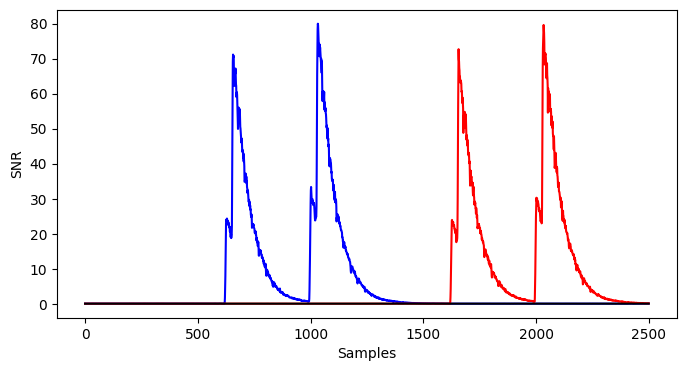

In [175]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    time_slice=[0,24998,10],
                                    trace_step=6)

result = snr.SNR(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], file_name=file_name)

result.run()

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0,:], 'blue')
ax.plot(result.results[1,:], 'red')
ax.plot(result.results[15,:], 'black')

plt.ylabel("SNR")
plt.xlabel("Samples")
plt.show()

Benchmark for full slice every 10th point every 6th trace

In [176]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    time_slice=[0,24998,10],
                                    trace_step=6)

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_1_16[10] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
2500
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
16.441999866665963


Verification for full slice every 10th point every 8th trace

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
2500
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


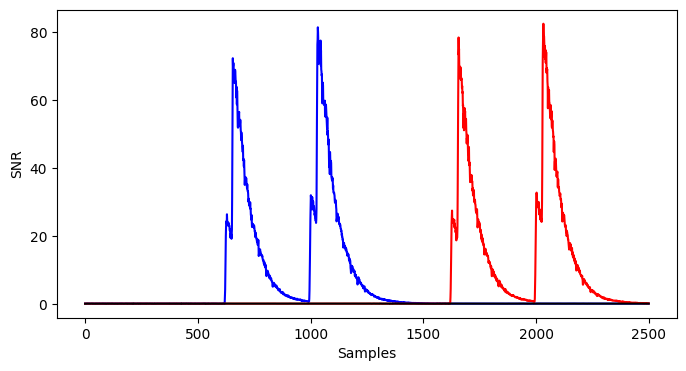

In [177]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    time_slice=[0,24998,10],
                                    trace_step=8)

result = snr.SNR(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], file_name=file_name)

result.run()

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0,:], 'blue')
ax.plot(result.results[1,:], 'red')
ax.plot(result.results[15,:], 'black')

plt.ylabel("SNR")
plt.xlabel("Samples")
plt.show()

Benchmark for full slice every 10th point every 8th trace

In [178]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    time_slice=[0,24998,10],
                                    trace_step=8)

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_2_16[10] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
2500
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
16.368738500013325


Verification for full slice every 10th point every 10th trace

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
2500
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


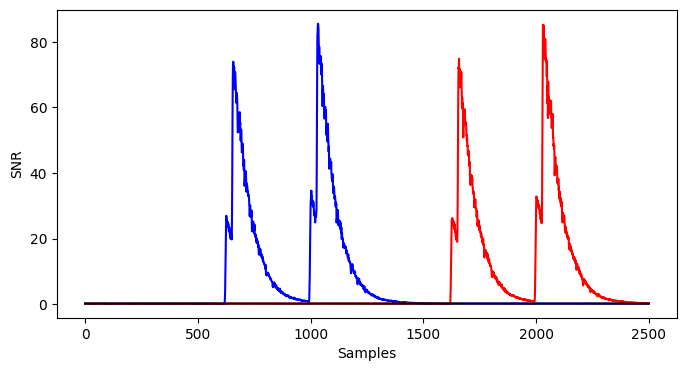

In [179]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    time_slice=[0,24998,10],
                                    trace_step=10)

result = snr.SNR(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], file_name=file_name)

result.run()

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0,:], 'blue')
ax.plot(result.results[1,:], 'red')
ax.plot(result.results[15,:], 'black')

plt.ylabel("SNR")
plt.xlabel("Samples")
plt.show()

Benchmark for full slice every 10th point every 10th trace

In [180]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    time_slice=[0,24998,10],
                                    trace_step=10)

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_3_16[10] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
2500
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
17.004084866610356


Verification for full slice every 20th point every 6th trace

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
1250
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


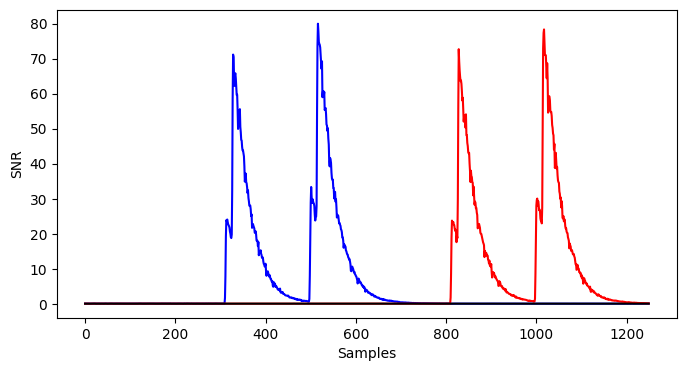

In [181]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    time_slice=[0,24998,20],
                                    trace_step=6)

result = snr.SNR(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], file_name=file_name)

result.run()

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0,:], 'blue')
ax.plot(result.results[1,:], 'red')
ax.plot(result.results[15,:], 'black')

plt.ylabel("SNR")
plt.xlabel("Samples")
plt.show()

Benchmark for full slice every 20th point every 6th trace

In [182]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    time_slice=[0,24998,20],
                                    trace_step=6)

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_1_16[20] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
1250
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
16.37847719997323


Verification for full slice every 20th point every 8th trace

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
1250
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


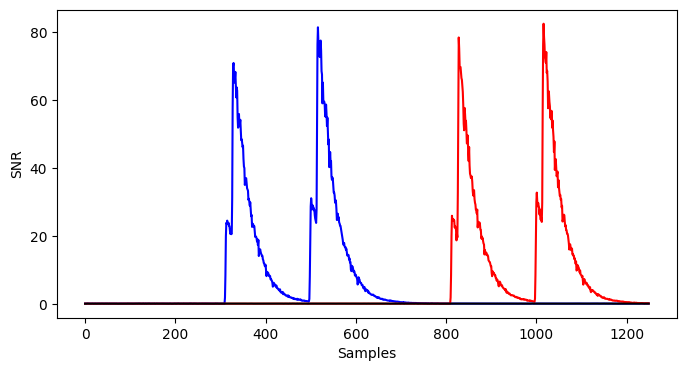

In [183]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    time_slice=[0,24998,20],
                                    trace_step=8)

result = snr.SNR(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], file_name=file_name)

result.run()

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0,:], 'blue')
ax.plot(result.results[1,:], 'red')
ax.plot(result.results[15,:], 'black')

plt.ylabel("SNR")
plt.xlabel("Samples")
plt.show()

Benchmark for full slice every 20th point every 8th trace

In [184]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    time_slice=[0,24998,20],
                                    trace_step=8)

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_2_16[20] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
1250
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
16.266353900001075


Verification for full slice every 20th point every 10th trace

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
1250
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


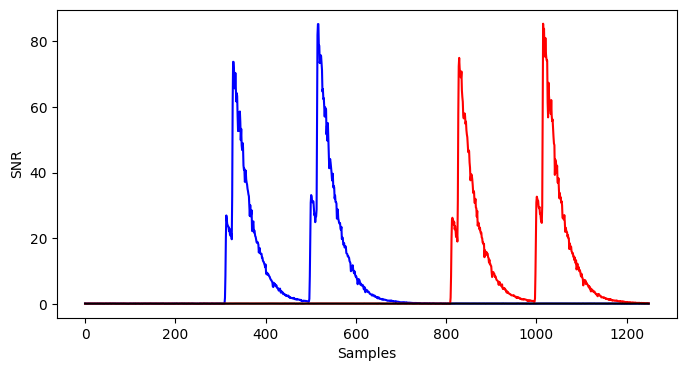

In [185]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    time_slice=[0,24998,20],
                                    trace_step=10)

result = snr.SNR(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], file_name=file_name)

result.run()

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0,:], 'blue')
ax.plot(result.results[1,:], 'red')
ax.plot(result.results[15,:], 'black')

plt.ylabel("SNR")
plt.xlabel("Samples")
plt.show()

Benchmark for full slice every 20th point every 10th trace

In [186]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    time_slice=[0,24998,20],
                                    trace_step=10)

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_3_16[20] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
1250
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
16.84465069998987


Verification for full slice every 50th point every 6th trace

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
500
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


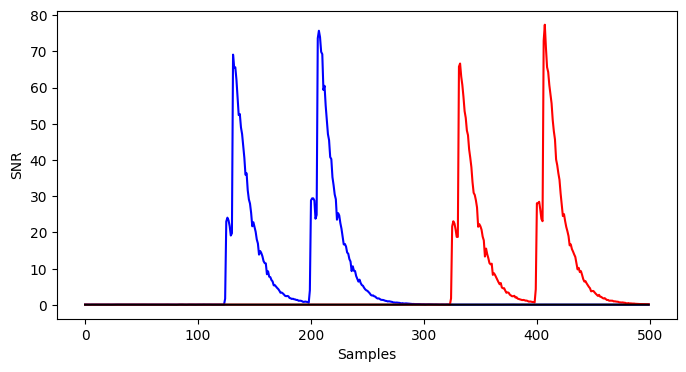

In [187]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    time_slice=[0,24998,50],
                                    trace_step=6)

result = snr.SNR(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], file_name=file_name)

result.run()

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0,:], 'blue')
ax.plot(result.results[1,:], 'red')
ax.plot(result.results[15,:], 'black')

plt.ylabel("SNR")
plt.xlabel("Samples")
plt.show()

Benchmark for full slice every 50th point every 6th trace

In [188]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    time_slice=[0,24998,50],
                                    trace_step=6)

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_1_16[50] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
500
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
16.166269933300402


Verification for full slice every 50th point every 8th trace

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
500
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


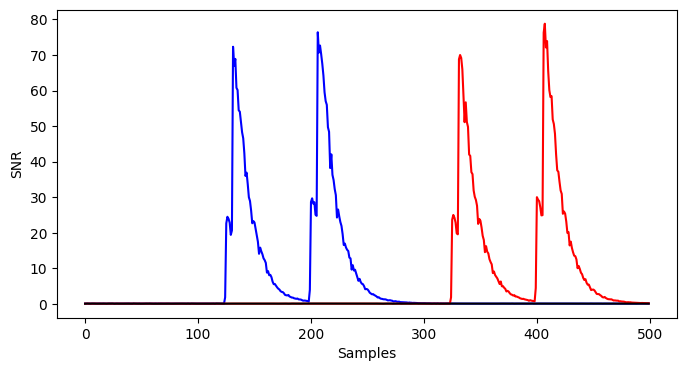

In [189]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    time_slice=[0,24998,50],
                                    trace_step=8)

result = snr.SNR(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], file_name=file_name)

result.run()

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0,:], 'blue')
ax.plot(result.results[1,:], 'red')
ax.plot(result.results[15,:], 'black')

plt.ylabel("SNR")
plt.xlabel("Samples")
plt.show()

Benchmark for full slice every 50th point every 8th trace

In [190]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    time_slice=[0,24998,50],
                                    trace_step=8)

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_2_16[50] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
500
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
16.300111500003066


Verification for full slice every 50th point every 10th trace

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
500
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


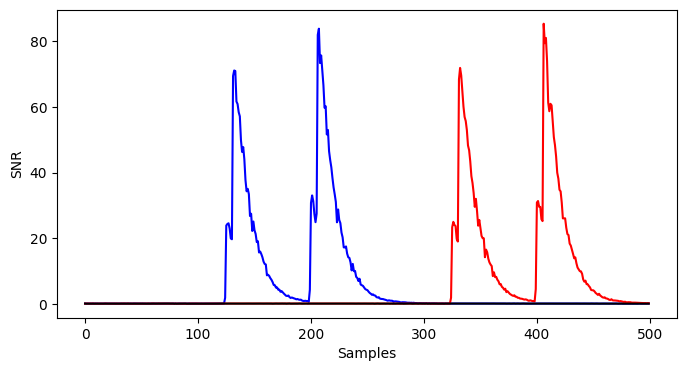

In [191]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    time_slice=[0,24998,50],
                                    trace_step=10)

result = snr.SNR(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], file_name=file_name)

result.run()

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0,:], 'blue')
ax.plot(result.results[1,:], 'red')
ax.plot(result.results[15,:], 'black')

plt.ylabel("SNR")
plt.xlabel("Samples")
plt.show()

Benchmark for full slice every 50th point every 10th trace

In [192]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    time_slice=[0,24998,50],
                                    trace_step=10)

for i in range(3):
    th.set_cursor(initial)
    temp = snr.SNR(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], file_name=file_name)
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_3_16[50] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
500
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing SNR: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
16.732874233314458


#### Results
***

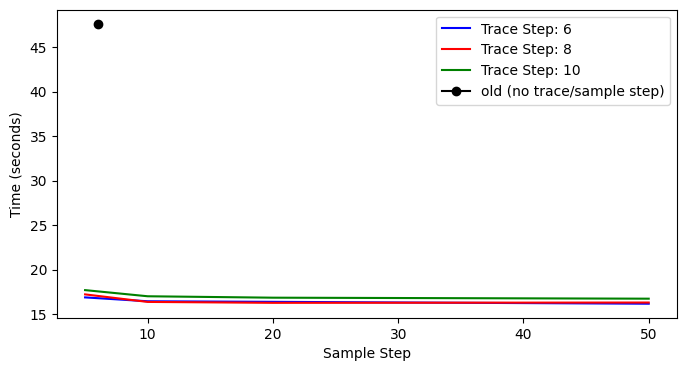

In [193]:
fig, ax = plt.subplots(figsize=(8, 4))

items_1 = Results_1_16.items()
x_1, y_1 = zip(*items_1)

items_2 = Results_2_16.items()
x_2, y_2 = zip(*items_2)

items_3 = Results_3_16.items()
x_3, y_3 = zip(*items_3)

labels = []

labels.append('Trace Step: 6')
ax.plot(x_1,y_1, color='blue')

labels.append('Trace Step: 8')
ax.plot(x_2,y_2, color='red')

labels.append('Trace Step: 10')
ax.plot(x_3,y_3, color='green')

labels.append('old (no trace/sample step)')
ax.plot(6,old_16, marker='o',color='black')

ax.set_xlabel('Sample Step')
ax.set_ylabel('Time (seconds)')
ax.legend(labels)

# CPA benchmark for Zarr advanced indexing functions
***

Default values: 1 byte, 5000 batch size, and 50k traces. Using file named "1x1x100000_r1_singlerail5_sr_ise.zarr".


Old sequential trace handler

In [16]:
initial = 50000
db_file = '1x1x100000_r1_singlerail5_sr_ise.zarr'
proj_root = os.getcwd()
file_name = os.path.join(proj_root, db_file)
to_avg = np.array([])

th = sequential.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial)

for i in range(3):
    th.set_cursor(initial)
    temp = cpa.CPA(Tracehandler=th, Bytes=[0])
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

old = avg

opened zarr file  /Users/utkarshsaxenna/Documents/capstone/notscared2/benchmarking/1x1x100000_r1_singlerail5_sr_ise.zarr
Computing CPA: Tiles:  False  Bytes:  [0]


KeyboardInterrupt: 

## Sample Downsampling
***

### Initialization
***

In [19]:
Results_6k_7K = {}
Results_full = {}
print(file_name)

/Users/utkarshsaxenna/Documents/capstone/notscared2/benchmarking/1x1x100000_r1_singlerail5_sr_ise.zarr


### Benchmarking and Verification
***

New tracehandler full slice verification

opened zarr file  /Users/utkarshsaxenna/Documents/capstone/notscared2/benchmarking/1x1x100000_r1_singlerail5_sr_ise.zarr
24999
Computing CPA: Tiles:  False  Bytes:  [0]
(109, 6289)


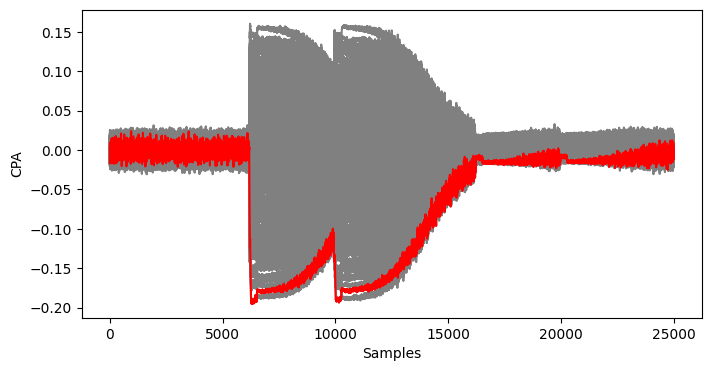

In [20]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001)

result = cpa.CPA(Tracehandler=th, Bytes=[0])

result.run()

key_index = np.unravel_index(np.abs(result.results[0, :, :]).argmax(), result.results.shape[1:])

print(key_index)

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0, :, :].T, 'gray')
ax.plot(result.results[0, key_index[0], :], 'red')

plt.ylabel("CPA")
plt.xlabel("Samples")
plt.show()

Benchmark for full slice

In [197]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial)

for i in range(3):
    th.set_cursor(initial)
    temp = cpa.CPA(Tracehandler=th, Bytes=[0])
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_full[1] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
24999
Computing CPA: Tiles:  False  Bytes:  [0]
Computing CPA: Tiles:  False  Bytes:  [0]
Computing CPA: Tiles:  False  Bytes:  [0]
15.315760433324613


Verification for 6k-7k slice

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
1000
Computing CPA: Tiles:  False  Bytes:  [0]
(109, 289)


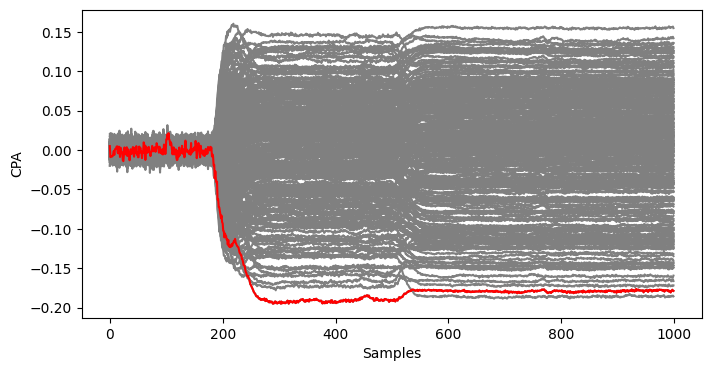

In [198]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    time_slice=[6000,7000])

result = cpa.CPA(Tracehandler=th, Bytes=[0])

result.run()

key_index = np.unravel_index(np.abs(result.results[0, :, :]).argmax(), result.results.shape[1:])

print(key_index)

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0, :, :].T, 'gray')
ax.plot(result.results[0, key_index[0], :], 'red')

plt.ylabel("CPA")
plt.xlabel("Samples")
plt.show()

Benchmark for 6k-7k slice

In [199]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    time_slice=[6000, 7000])

for i in range(3):
    th.set_cursor(initial)
    temp = cpa.CPA(Tracehandler=th, Bytes=[0])
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_6k_7K[1] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
1000
Computing CPA: Tiles:  False  Bytes:  [0]
Computing CPA: Tiles:  False  Bytes:  [0]
Computing CPA: Tiles:  False  Bytes:  [0]
9.163876666687429


Verification for full slice every 3rd point

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
8333
Computing CPA: Tiles:  False  Bytes:  [0]
(109, 2101)


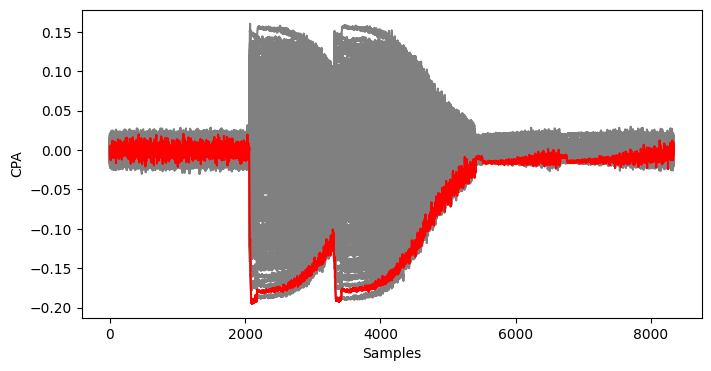

In [200]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    time_slice=[0, 24998, 3])

result = cpa.CPA(Tracehandler=th, Bytes=[0])

result.run()

key_index = np.unravel_index(np.abs(result.results[0, :, :]).argmax(), result.results.shape[1:])

print(key_index)

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0, :, :].T, 'gray')
ax.plot(result.results[0, key_index[0], :], 'red')

plt.ylabel("CPA")
plt.xlabel("Samples")
plt.show()

Benchmark for full slice every 3rd point

In [201]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    time_slice=[0, 24998, 3])

for i in range(3):
    th.set_cursor(initial)
    temp = cpa.CPA(Tracehandler=th, Bytes=[0])
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_full[3] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
8333
Computing CPA: Tiles:  False  Bytes:  [0]
Computing CPA: Tiles:  False  Bytes:  [0]
Computing CPA: Tiles:  False  Bytes:  [0]
11.151778499983871


Verification for 6k-7k slice every 2nd point

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
500
Computing CPA: Tiles:  False  Bytes:  [0]
(109, 155)


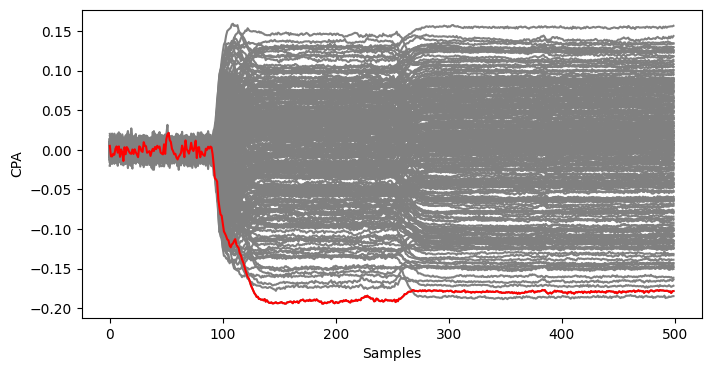

In [202]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    time_slice=[6000,7000, 2])

result = cpa.CPA(Tracehandler=th, Bytes=[0])

result.run()

key_index = np.unravel_index(np.abs(result.results[0, :, :]).argmax(), result.results.shape[1:])

print(key_index)

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0, :, :].T, 'gray')
ax.plot(result.results[0, key_index[0], :], 'red')

plt.ylabel("CPA")
plt.xlabel("Samples")
plt.show()

Benchmark for 6k-7k slice every 2nd point

In [203]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    time_slice=[6000, 7000, 2])

for i in range(3):
    th.set_cursor(initial)
    temp = cpa.CPA(Tracehandler=th, Bytes=[0])
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_6k_7K[2] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
500
Computing CPA: Tiles:  False  Bytes:  [0]
Computing CPA: Tiles:  False  Bytes:  [0]
Computing CPA: Tiles:  False  Bytes:  [0]
9.104946400038898


Verification for full slice every 5th point

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
5000
Computing CPA: Tiles:  False  Bytes:  [0]
(109, 1261)


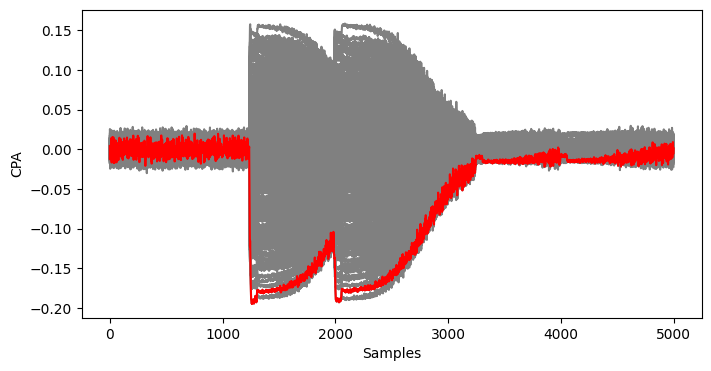

In [204]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    time_slice=[0, 24998, 5])

result = cpa.CPA(Tracehandler=th, Bytes=[0])

result.run()

key_index = np.unravel_index(np.abs(result.results[0, :, :]).argmax(), result.results.shape[1:])

print(key_index)

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0, :, :].T, 'gray')
ax.plot(result.results[0, key_index[0], :], 'red')

plt.ylabel("CPA")
plt.xlabel("Samples")
plt.show()

Benchmark for full slice every 5th point

In [205]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    time_slice=[0, 24998, 5])

for i in range(3):
    th.set_cursor(initial)
    temp = cpa.CPA(Tracehandler=th, Bytes=[0])
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_full[5] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
5000
Computing CPA: Tiles:  False  Bytes:  [0]
Computing CPA: Tiles:  False  Bytes:  [0]
Computing CPA: Tiles:  False  Bytes:  [0]
10.337022033326017


Verification for 6k-7k slice every 3rd point

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
334
Computing CPA: Tiles:  False  Bytes:  [0]
(109, 101)


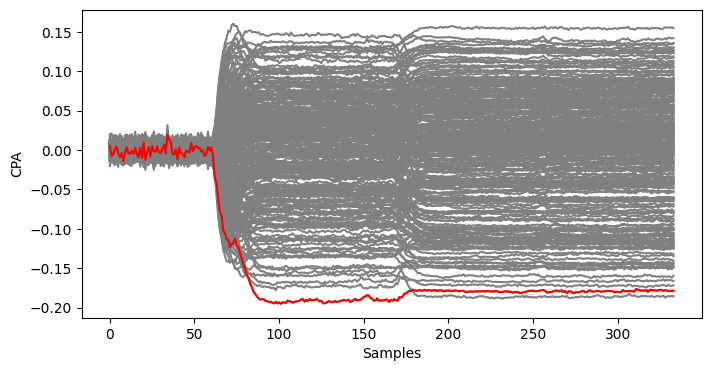

In [206]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    time_slice=[6000,7000, 3])

result = cpa.CPA(Tracehandler=th, Bytes=[0])

result.run()

key_index = np.unravel_index(np.abs(result.results[0, :, :]).argmax(), result.results.shape[1:])

print(key_index)

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0, :, :].T, 'gray')
ax.plot(result.results[0, key_index[0], :], 'red')

plt.ylabel("CPA")
plt.xlabel("Samples")
plt.show()

Benchmark for 6k-7k slice every 3rd point

In [207]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    time_slice=[6000, 7000, 3])

for i in range(3):
    th.set_cursor(initial)
    temp = cpa.CPA(Tracehandler=th, Bytes=[0])
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_6k_7K[3] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
334
Computing CPA: Tiles:  False  Bytes:  [0]
Computing CPA: Tiles:  False  Bytes:  [0]
Computing CPA: Tiles:  False  Bytes:  [0]
9.015145966627946


Verification for full slice every 7th point

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
3572
Computing CPA: Tiles:  False  Bytes:  [0]
(109, 911)


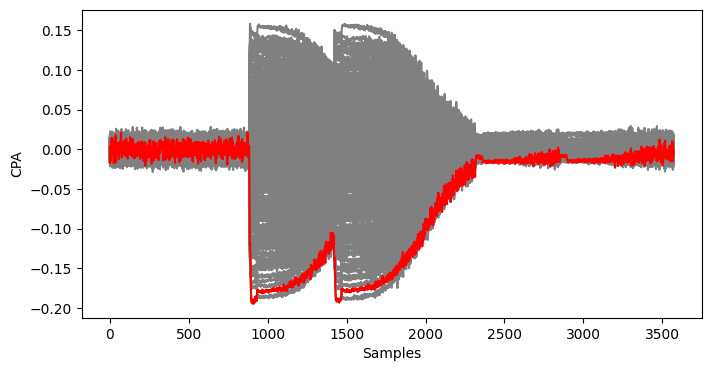

In [208]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    time_slice=[0, 24998, 7])

result = cpa.CPA(Tracehandler=th, Bytes=[0])

result.run()

key_index = np.unravel_index(np.abs(result.results[0, :, :]).argmax(), result.results.shape[1:])

print(key_index)

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0, :, :].T, 'gray')
ax.plot(result.results[0, key_index[0], :], 'red')

plt.ylabel("CPA")
plt.xlabel("Samples")
plt.show()

Benchmark for full slice every 7th point

In [209]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    time_slice=[0, 24998, 7])

for i in range(3):
    th.set_cursor(initial)
    temp = cpa.CPA(Tracehandler=th, Bytes=[0])
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_full[7] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
3572
Computing CPA: Tiles:  False  Bytes:  [0]
Computing CPA: Tiles:  False  Bytes:  [0]
Computing CPA: Tiles:  False  Bytes:  [0]
9.940733733354136


### Results
***

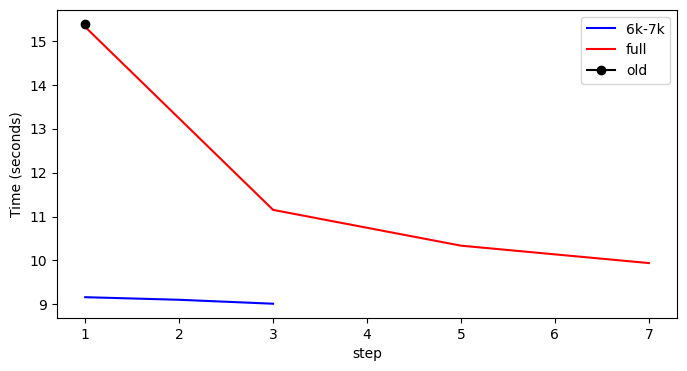

In [210]:
fig, ax = plt.subplots(figsize=(8, 4))

small = Results_6k_7K.items()
x_small, y_small = zip(*small)

large = Results_full.items()
x_large, y_large = zip(*large)

labels = []

labels.append('6k-7k')
ax.plot(x_small, y_small, color='blue')

labels.append('full')
ax.plot(x_large, y_large, color='red')

labels.append('old')
ax.plot(1, old, marker='o', color='black')

ax.set_xlabel('step')
ax.set_ylabel('Time (seconds)')
ax.legend(labels)

## Trace DownSampling
***

Initialization

In [21]:
Results = {}

print(file_name)

/Users/utkarshsaxenna/Documents/capstone/notscared2/benchmarking/1x1x100000_r1_singlerail5_sr_ise.zarr


### Benchmarking and Verification
***

Benchmark for Every trace

In [22]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial)

for i in range(3):
    th.set_cursor(initial)
    temp = cpa.CPA(Tracehandler=th, Bytes=[0])
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results[1] = avg

opened zarr file  /Users/utkarshsaxenna/Documents/capstone/notscared2/benchmarking/1x1x100000_r1_singlerail5_sr_ise.zarr
24999
Computing CPA: Tiles:  False  Bytes:  [0]
Computing CPA: Tiles:  False  Bytes:  [0]
Computing CPA: Tiles:  False  Bytes:  [0]
10.058078180334027


Verification for every 2nd trace

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
24999
Computing CPA: Tiles:  False  Bytes:  [0]
(109, 6395)


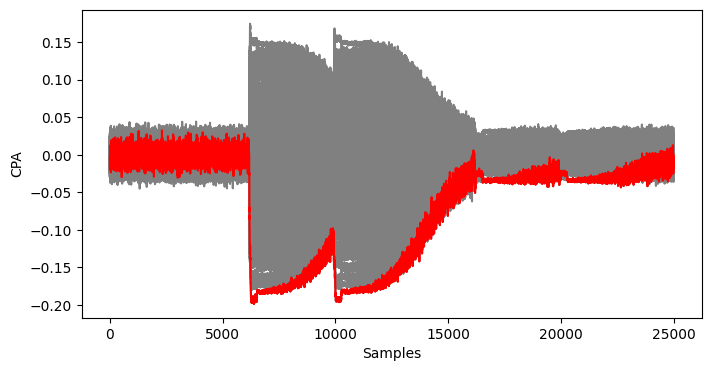

In [213]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    trace_step=2)

result = cpa.CPA(Tracehandler=th, Bytes=[0])

result.run()

key_index = np.unravel_index(np.abs(result.results[0, :, :]).argmax(), result.results.shape[1:])

print(key_index)

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0, :, :].T, 'gray')
ax.plot(result.results[0, key_index[0], :], 'red')

plt.ylabel("CPA")
plt.xlabel("Samples")
plt.show()

Benchmark for every 2nd trace

In [214]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    trace_step=2)

for i in range(3):
    th.set_cursor(initial)
    temp = cpa.CPA(Tracehandler=th, Bytes=[0])
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results[2] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
24999
Computing CPA: Tiles:  False  Bytes:  [0]
Computing CPA: Tiles:  False  Bytes:  [0]
Computing CPA: Tiles:  False  Bytes:  [0]
8.018022666685283


Verification for every 3rd trace

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
24999
Computing CPA: Tiles:  False  Bytes:  [0]
(197, 11105)


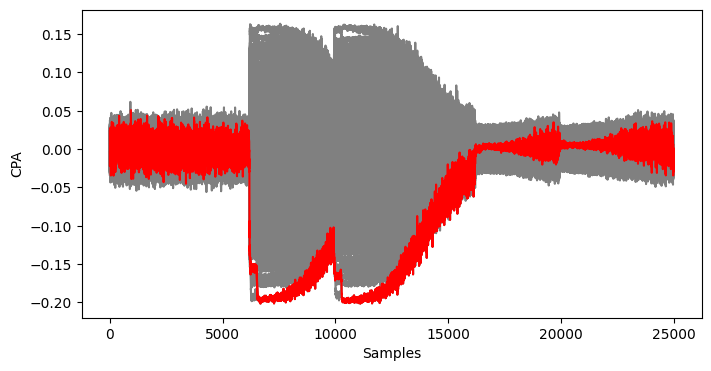

In [215]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    trace_step=3)

result = cpa.CPA(Tracehandler=th, Bytes=[0])

result.run()

key_index = np.unravel_index(np.abs(result.results[0, :, :]).argmax(), result.results.shape[1:])

print(key_index)

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0, :, :].T, 'gray')
ax.plot(result.results[0, key_index[0], :], 'red')

plt.ylabel("CPA")
plt.xlabel("Samples")
plt.show()

### Results
***

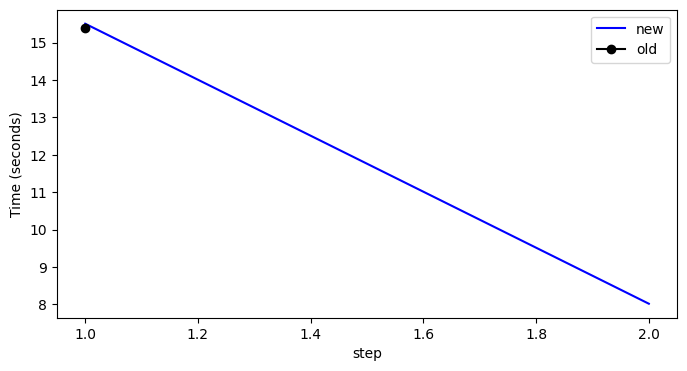

In [216]:
fig, ax = plt.subplots(figsize=(8, 4))

items = Results.items()
x, y = zip(*items)


labels = []

labels.append('new')
ax.plot(x,y, color='blue')

labels.append('old')
ax.plot(1,old, marker='o',color='black')

ax.set_xlabel('step')
ax.set_ylabel('Time (seconds)')
ax.legend(labels)

## Trace and Sample downsampling
***

Initialization

In [23]:
Results = {}
print(file_name)

/Users/utkarshsaxenna/Documents/capstone/notscared2/benchmarking/1x1x100000_r1_singlerail5_sr_ise.zarr


### Benchmark and Verification
***

Verification for 6k-7k slice and every 2nd trace

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
1000
Computing CPA: Tiles:  False  Bytes:  [0]
(109, 395)


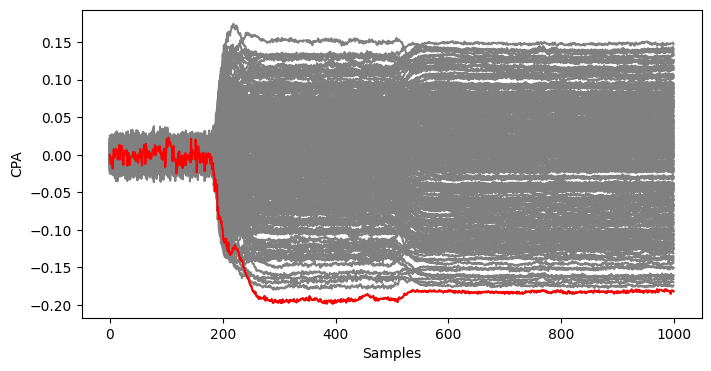

In [218]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    time_slice=[6000,7000],
                                    trace_step=2)

result = cpa.CPA(Tracehandler=th, Bytes=[0])

result.run()

key_index = np.unravel_index(np.abs(result.results[0, :, :]).argmax(), result.results.shape[1:])

print(key_index)

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0, :, :].T, 'gray')
ax.plot(result.results[0, key_index[0], :], 'red')

plt.ylabel("CPA")
plt.xlabel("Samples")
plt.show()

Benchmark for 6k-7k slice every 2nd trace

In [219]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    time_slice=[6000, 7000],
                                    trace_step=2)

for i in range(3):
    th.set_cursor(initial)
    temp = cpa.CPA(Tracehandler=th, Bytes=[0])
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results[1] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
1000
Computing CPA: Tiles:  False  Bytes:  [0]
Computing CPA: Tiles:  False  Bytes:  [0]
Computing CPA: Tiles:  False  Bytes:  [0]
4.897656433323088


Verification for 6k-7k slice every 2nd point every 2nd trace

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
500
Computing CPA: Tiles:  False  Bytes:  [0]
(109, 199)


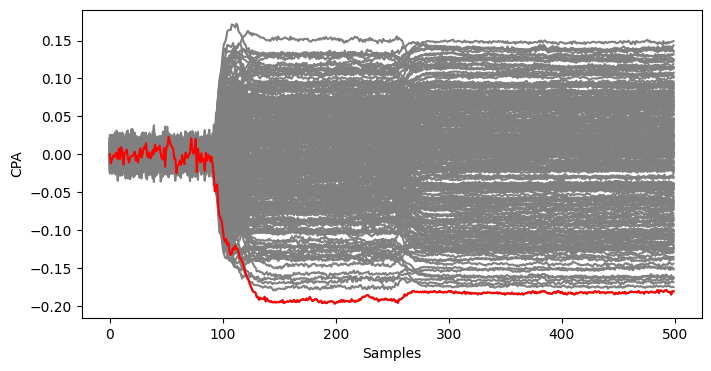

In [220]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    time_slice=[6000,7000, 2],
                                    trace_step=2)

result = cpa.CPA(Tracehandler=th, Bytes=[0])

result.run()

key_index = np.unravel_index(np.abs(result.results[0, :, :]).argmax(), result.results.shape[1:])

print(key_index)

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0, :, :].T, 'gray')
ax.plot(result.results[0, key_index[0], :], 'red')

plt.ylabel("CPA")
plt.xlabel("Samples")
plt.show()

Benchmark for 6k-7k every 2nd point every 2nd trace

In [221]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    time_slice=[6000, 7000, 2],
                                    trace_step=2)

for i in range(3):
    th.set_cursor(initial)
    temp = cpa.CPA(Tracehandler=th, Bytes=[0])
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results[2] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
500
Computing CPA: Tiles:  False  Bytes:  [0]
Computing CPA: Tiles:  False  Bytes:  [0]
Computing CPA: Tiles:  False  Bytes:  [0]
4.730813200042273


Verification for 6k-7k every 3rd point every 2nd trace

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
334
Computing CPA: Tiles:  False  Bytes:  [0]
(109, 127)


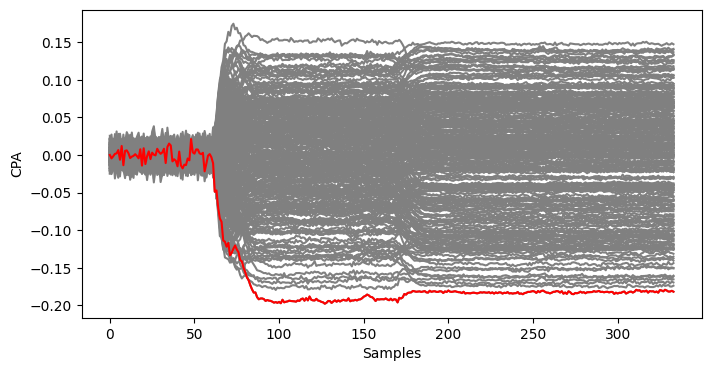

In [222]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    time_slice=[6000, 7000, 3],
                                    trace_step=2)

result = cpa.CPA(Tracehandler=th, Bytes=[0])

result.run()

key_index = np.unravel_index(np.abs(result.results[0, :, :]).argmax(), result.results.shape[1:])

print(key_index)

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0, :, :].T, 'gray')
ax.plot(result.results[0, key_index[0], :], 'red')

plt.ylabel("CPA")
plt.xlabel("Samples")
plt.show()

Benchmark for 6k-7k slice every 3rd point every 2nd trace

In [223]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    time_slice=[6000, 7000, 3],
                                    trace_step=2)

for i in range(3):
    th.set_cursor(initial)
    temp = cpa.CPA(Tracehandler=th, Bytes=[0])
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results[3] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
334
Computing CPA: Tiles:  False  Bytes:  [0]
Computing CPA: Tiles:  False  Bytes:  [0]
Computing CPA: Tiles:  False  Bytes:  [0]
4.72128093331897


### Results
***

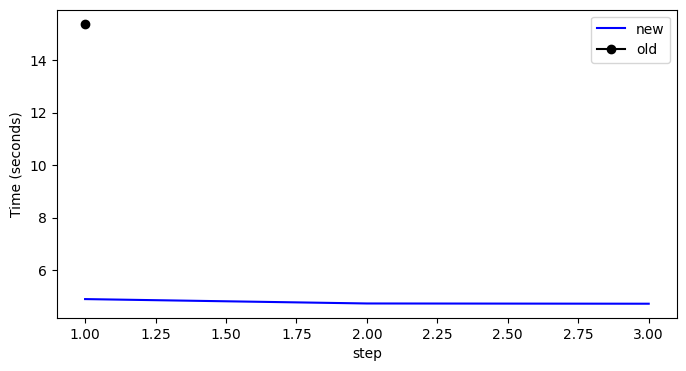

In [224]:
fig, ax = plt.subplots(figsize=(8, 4))

items = Results.items()
x, y = zip(*items)


labels = []

labels.append('new')
ax.plot(x,y, color='blue')

labels.append('old')
ax.plot(1,old, marker='o',color='black')

ax.set_xlabel('step')
ax.set_ylabel('Time (seconds)')
ax.legend(labels)

## 16 byte Downsampling
***

old

In [24]:
initial = 50000
to_avg = np.array([])

th = sequential.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial)

for i in range(3):
    th.set_cursor(initial)
    temp = cpa.CPA(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

old_16 = avg

opened zarr file  /Users/utkarshsaxenna/Documents/capstone/notscared2/benchmarking/1x1x100000_r1_singlerail5_sr_ise.zarr
Computing CPA: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


KeyboardInterrupt: 

### Sample downsampling
***

Initialization

In [226]:
Results_16 = {}
file_name = (proj_root + '\\notscared2\\1x1x100000_r1_singlerail5_sr_ise.zarr')
print(file_name)

c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr


#### Benchmarking and Verification
***

Verification for full slice every 5th point

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
5000
Computing CPA: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
(109, 1261)


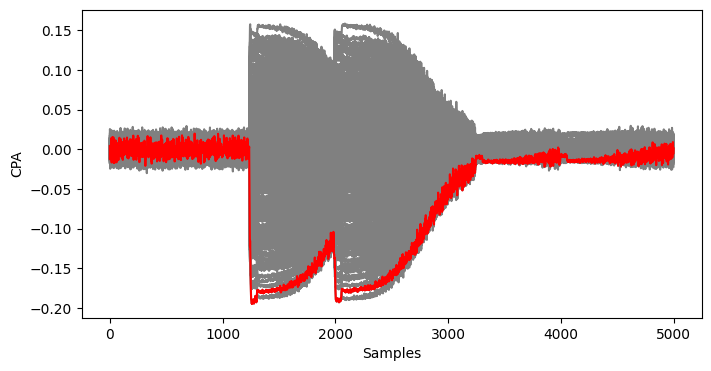

In [227]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    time_slice=[0, 24999, 5])

result = cpa.CPA(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

result.run()

key_index = np.unravel_index(np.abs(result.results[0, :, :]).argmax(), result.results.shape[1:])

print(key_index)

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0, :, :].T, 'gray')
ax.plot(result.results[0, key_index[0], :], 'red')

plt.ylabel("CPA")
plt.xlabel("Samples")
plt.show()

Benchmark for full slice every 5th point

In [228]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    time_slice=[0, 24999, 5])

for i in range(3):
    th.set_cursor(initial)
    temp = cpa.CPA(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_16[5] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
5000
Computing CPA: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing CPA: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing CPA: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
45.44729320002565


Verification for full slice every 10th point

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
2500
Computing CPA: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
(109, 631)


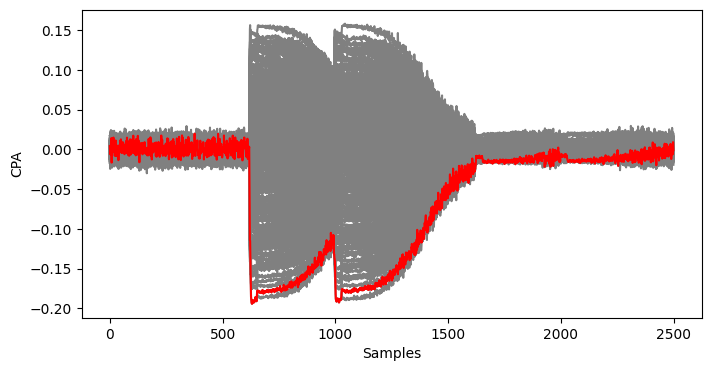

In [229]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    time_slice=[0, 24999, 10])

result = cpa.CPA(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

result.run()

key_index = np.unravel_index(np.abs(result.results[0, :, :]).argmax(), result.results.shape[1:])

print(key_index)

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0, :, :].T, 'gray')
ax.plot(result.results[0, key_index[0], :], 'red')

plt.ylabel("CPA")
plt.xlabel("Samples")
plt.show()

Benchmark for full slice every 10th point

In [230]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    time_slice=[0, 24999, 10])

for i in range(3):
    th.set_cursor(initial)
    temp = cpa.CPA(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_16[10] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
2500
Computing CPA: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing CPA: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing CPA: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
38.963531433333024


Verification for full slice every 20th point

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
1250
Computing CPA: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
(109, 315)


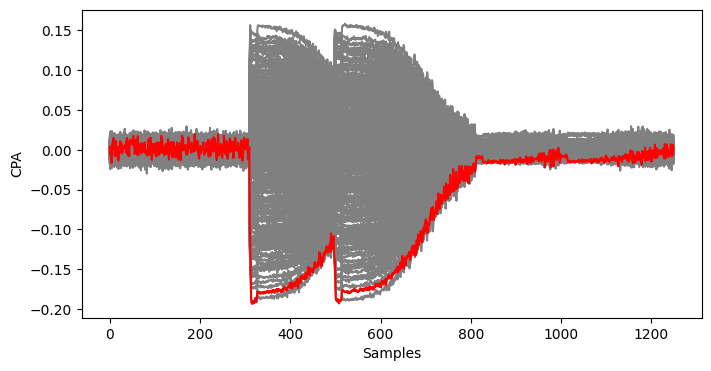

In [231]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    time_slice=[0, 24999, 20])

result = cpa.CPA(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

result.run()

key_index = np.unravel_index(np.abs(result.results[0, :, :]).argmax(), result.results.shape[1:])

print(key_index)

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0, :, :].T, 'gray')
ax.plot(result.results[0, key_index[0], :], 'red')

plt.ylabel("CPA")
plt.xlabel("Samples")
plt.show()

Benchmark for full slice every 20th point

In [232]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    time_slice=[0, 24999, 20])

for i in range(3):
    th.set_cursor(initial)
    temp = cpa.CPA(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_16[20] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
1250
Computing CPA: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing CPA: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing CPA: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
35.25383773333548


Verification for full slice every 50th point

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
500
Computing CPA: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
(109, 126)


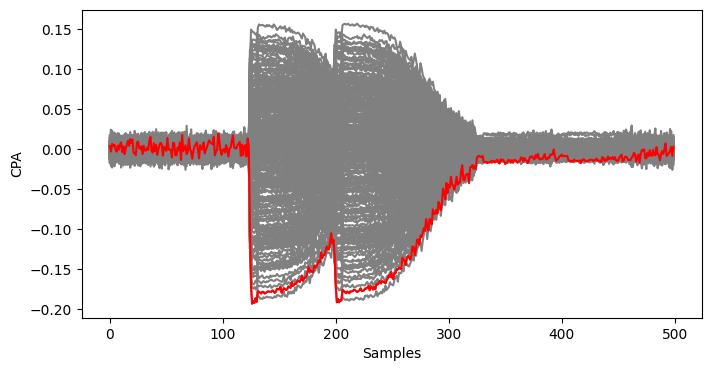

In [233]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    time_slice=[0, 24999, 50])

result = cpa.CPA(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

result.run()

key_index = np.unravel_index(np.abs(result.results[0, :, :]).argmax(), result.results.shape[1:])

print(key_index)

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0, :, :].T, 'gray')
ax.plot(result.results[0, key_index[0], :], 'red')

plt.ylabel("CPA")
plt.xlabel("Samples")
plt.show()

Benchmark for full slice every 50th point

In [234]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    time_slice=[0, 24999, 50])

for i in range(3):
    th.set_cursor(initial)
    temp = cpa.CPA(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_16[50] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
500
Computing CPA: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing CPA: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing CPA: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
32.776880266688146


#### Results
***

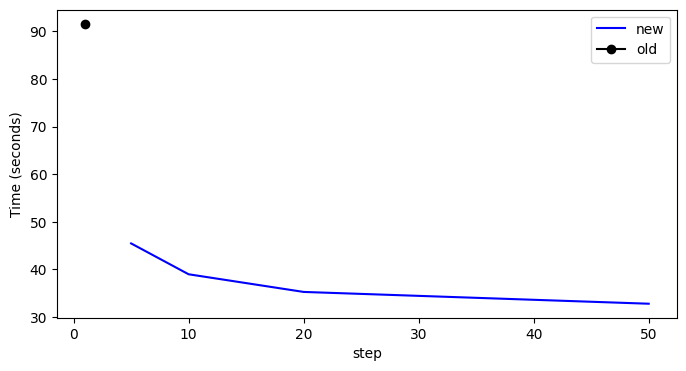

In [235]:
fig, ax = plt.subplots(figsize=(8, 4))

items = Results_16.items()
x, y = zip(*items)


labels = []

labels.append('new')
ax.plot(x,y, color='blue')

labels.append('old')
ax.plot(1,old_16, marker='o',color='black')

ax.set_xlabel('step')
ax.set_ylabel('Time (seconds)')
ax.legend(labels)

### Trace and Sample Downsampling
***

Initialization

In [236]:
Results_16 = {}
db_file = '1x1x100000_r1_singlerail5_sr_ise.zarr'
proj_root = os.getcwd()
file_name = os.path.join(proj_root, db_file)
print(file_name)

c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr


#### Benchmarking and Verification
***

Verification for full slice every 10th point and every 2nd trace

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
2500
Computing CPA: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
(109, 640)


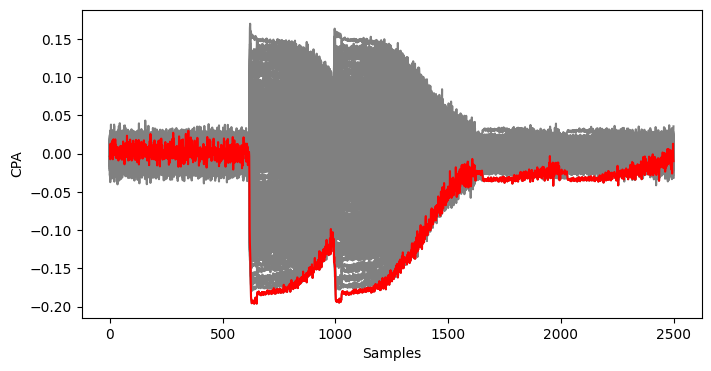

In [237]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    time_slice=[0, 24998, 10],
                                    trace_step=2)

result = cpa.CPA(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

result.run()

key_index = np.unravel_index(np.abs(result.results[0, :, :]).argmax(), result.results.shape[1:])

print(key_index)

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0, :, :].T, 'gray')
ax.plot(result.results[0, key_index[0], :], 'red')

plt.ylabel("CPA")
plt.xlabel("Samples")
plt.show()

Benchmark for full slice every 10th point every 2nd trace

In [238]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    time_slice=[0, 24998, 10],
                                    trace_step=2)

for i in range(3):
    th.set_cursor(initial)
    temp = cpa.CPA(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_16[10] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
2500
Computing CPA: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing CPA: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing CPA: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
20.003582166701865


Verification for full slice every 20th point every 2nd trace

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
1250
Computing CPA: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
(109, 320)


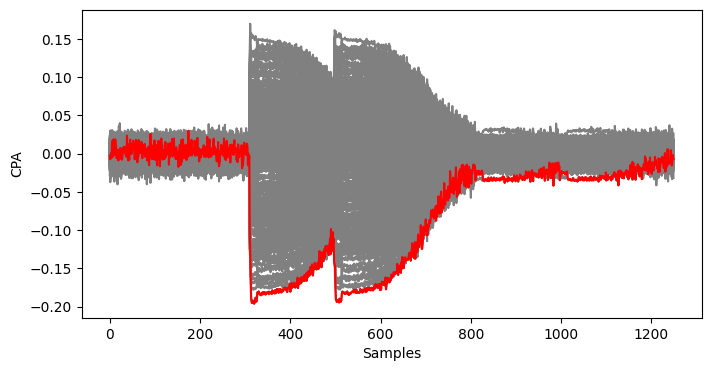

In [239]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    time_slice=[0, 24998, 20],
                                    trace_step=2)

result = cpa.CPA(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

result.run()

key_index = np.unravel_index(np.abs(result.results[0, :, :]).argmax(), result.results.shape[1:])

print(key_index)

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0, :, :].T, 'gray')
ax.plot(result.results[0, key_index[0], :], 'red')

plt.ylabel("CPA")
plt.xlabel("Samples")
plt.show()

Benchmark for full slice every 20th point every 2nd trace

In [240]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    time_slice=[0, 24998, 20],
                                    trace_step=2)

for i in range(3):
    th.set_cursor(initial)
    temp = cpa.CPA(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_16[20] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
1250
Computing CPA: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing CPA: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing CPA: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
17.83201433334034


Verification for full slice every 50th point every 2nd trace

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
500
Computing CPA: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
(109, 128)


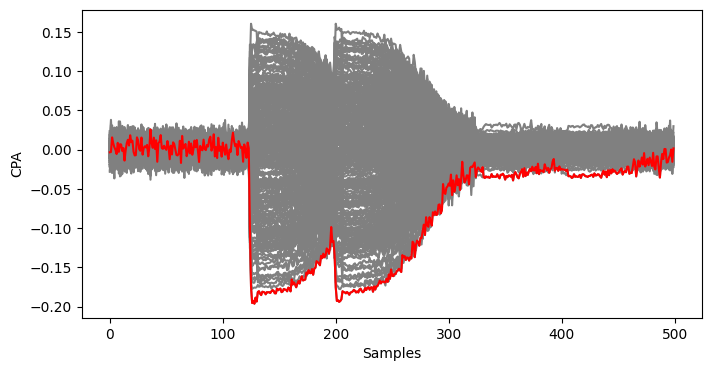

In [241]:
th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=75001,
                                    time_slice=[0, 24998, 50],
                                    trace_step=2)

result = cpa.CPA(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

result.run()

key_index = np.unravel_index(np.abs(result.results[0, :, :]).argmax(), result.results.shape[1:])

print(key_index)

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(result.results[0, :, :].T, 'gray')
ax.plot(result.results[0, key_index[0], :], 'red')

plt.ylabel("CPA")
plt.xlabel("Samples")
plt.show()

Benchmark for full slice every 50th point every 2nd trace

In [242]:
initial = 50000
to_avg = np.array([])

th = advanced.TraceHandler(fileName=file_name, 
                                    batchSize=5000, 
                                    batchStart=initial,
                                    time_slice=[0, 24998, 50],
                                    trace_step=2)

for i in range(3):
    th.set_cursor(initial)
    temp = cpa.CPA(Tracehandler=th, Bytes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
    start = time.perf_counter()
    temp.run()
    stop = time.perf_counter()
    to_avg = np.append(to_avg, stop-start)

avg = np.mean(to_avg)
print(avg)

Results_16[50] = avg

opened zarr file  c:\Users\Jonah\Documents\GitHub\notscared2\1x1x100000_r1_singlerail5_sr_ise.zarr
500
Computing CPA: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing CPA: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Computing CPA: Tiles:  False  Bytes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
16.862187066619907


#### Results
***

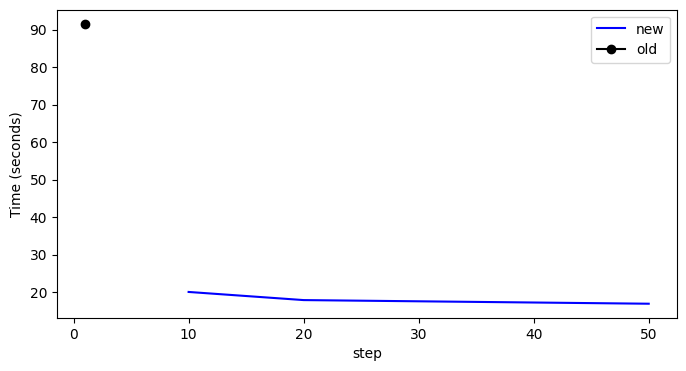

In [243]:
fig, ax = plt.subplots(figsize=(8, 4))

items = Results_16.items()
x, y = zip(*items)


labels = []

labels.append('new')
ax.plot(x,y, color='blue')

labels.append('old')
ax.plot(1,old_16, marker='o',color='black')

ax.set_xlabel('step')
ax.set_ylabel('Time (seconds)')
ax.legend(labels)